# ***データの前処理***

## ***必要ライブラリの読み込み***

In [1]:
!pip install scipy
!pip install statsmodels
!pip install pingouin
!pip install japanize_matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 204.4/204.4 kB 4.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.1/4.1 MB 38.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for japanize_matplotlib: filename=japanize_matplotlib-1.1.3-py3-none-any.whl size=4120257 sha256=0840bfeaaa5516ae48b4fe39a6729d2b434cdcde43bb6112e9f907684b5a1404
  Stored in directory: /root/.cache/pip/wheels/c1/f7/9b/418f19a7b9340fc16e071e89efc379aca68d40238b258df53d
Successfully built japanize_matplotlib


In [2]:
!pip install statannotations

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import statsmodels as sm
import statannotations.Annotator

In [4]:
import japanize_matplotlib
sns.set(style = 'whitegrid',
        font="IPAexGothic")

## ***データの読み込みと前処理***

In [5]:
original_file = '卒論結果まとめ.xlsx'
output_filename = 'dummy_data_N30.csv'
N_new = 40
np.random.seed(42) # 結果の再現性を担保

In [55]:
# GitHubのリポジトリからデータの所得
!wget https://github.com/Fuga420/memory-learning-comparison/raw/refs/heads/main/data/%E5%8D%92%E8%AB%96%E7%B5%90%E6%9E%9C%E3%81%BE%E3%81%A8%E3%82%81.xlsx

--2026-01-05 12:38:53--  https://github.com/Fuga420/memory-learning-comparison/raw/refs/heads/main/data/%E5%8D%92%E8%AB%96%E7%B5%90%E6%9E%9C%E3%81%BE%E3%81%A8%E3%82%81.xlsx
Resolving github.com (github.com)... 20.27.177.113
Connecting to github.com (github.com)|20.27.177.113|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/Fuga420/memory-learning-comparison/refs/heads/main/data/%E5%8D%92%E8%AB%96%E7%B5%90%E6%9E%9C%E3%81%BE%E3%81%A8%E3%82%81.xlsx [following]
--2026-01-05 12:38:53--  https://raw.githubusercontent.com/Fuga420/memory-learning-comparison/refs/heads/main/data/%E5%8D%92%E8%AB%96%E7%B5%90%E6%9E%9C%E3%81%BE%E3%81%A8%E3%82%81.xlsx
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 11731 (11K

In [56]:
# 元データの読み込みと統計量

df_original = pd.read_excel('卒論結果まとめ.xlsx')
stats = df_original.select_dtypes(include=['number']).describe()

round(stats.loc[['mean', 'std']],2)

,WMC,Read(short-term),Write(short-term),Listen(short-term),Speak(short-term),Read(long-term),Write(long-term),Listen(long-term),Speak(long-term),Read(load),Write(load),Listen(load),Speak(load)
mean,11.75,13.78,12.52,12.25,13.98,11.79,11.00,11.24,12.05,22.62,27.28,25.03,23.21
std,3.05,4.32,3.46,4.31,3.75,3.53,3.56,4.21,4.29,6.72,6.70,5.44,6.47


In [8]:
df_original

,Participant_ID,WMC,Read(short-term),Write(short-term),Listen(short-term),Speak(short-term),Read(long-term),Write(long-term),Listen(long-term),Speak(long-term),Read(load),Write(load),Listen(load),Speak(load)
0,P01,9,12,13,13,9,12.0,9.0,9.0,11.0,30.0,31.0,28.0,29.0
1,P02,12,14,12,17,15,12.0,14.0,13.0,14.0,22.0,11.0,16.0,11.0
2,P03,11,14,13,16,17,14.0,14.0,18.0,17.0,9.0,28.0,16.0,12.0
3,P04,6,12,10,10,14,10.0,8.0,10.0,13.0,26.0,24.0,22.0,23.0
4,P05,10,12,14,12,16,10.0,13.0,11.0,11.0,25.0,32.0,19.0,29.0
5,P06,9,14,15,12,16,10.0,12.0,10.0,12.0,15.0,15.0,17.0,22.0
6,P07,8,13,11,13,11,11.0,9.0,11.0,11.0,24.0,25.0,18.0,25.0
7,P08,8,10,6,13,16,11.0,10.0,10.0,15.0,22.0,30.0,32.0,27.0
8,P09,11,21,16,17,17,17.0,18.0,20.0,16.0,16.0,31.0,18.0,23.0
9,P10,10,15,14,15,16,13.0,13.0,9.0,13.0,42.0,35.0,38.0,21.0


In [57]:
# ==========================================
# 1. 参加者プロファイルの生成（地頭の設定）
# ==========================================

# ワーキングメモリ(WMC)を生成 [平均9.5, 標準偏差2.0]
wmc = np.random.normal(9.5, 2.0, N_new)
wmc = np.clip(wmc, 4, 16) # 異常値をカット

# 「基礎記憶力 (Base Ability)」を定義
# WMCが高い人ほど基礎能力が高くなるように設定（相関係数を持たせる）
# 平均12点くらいになるように調整
base_ability = (wmc * 0.8) + np.random.normal(0, 1.5, N_new) + 4.5
base_ability = np.clip(base_ability, 5, 20)

# ==========================================
# 2. 各テストのスコア生成（条件ごとの特徴を加味）
# ==========================================
scores = {}
methods = ['Read', 'Write', 'Listen', 'Speak']

# --- (A) 短期記憶 (ShortTerm) ---
# 仮説：Speak(話す)は生成効果で高く、Write(書く)は時間不足で低い
offsets_short = {
    'Read': 0,      # 基準
    'Write': -1.0,  # 書くのは時間がかかり直後は点数が低い
    'Listen': -0.5, # 聞くだけは少し低い
    'Speak': +1.5   # 話すと記憶に残りやすい（生成効果）
}

for m in methods:
    # スコア = 基礎能力 + 手法のご利益 + ランダム誤差
    score = base_ability + offsets_short[m] + np.random.normal(0, 2.0, N_new)
    scores[f'{m}_ShortTerm'] = np.clip(score, 0, 25).round().astype(int)

# --- (B) 長期記憶 (LongTerm) ---
# 仮説：Write(書く)は大変だけど定着が良い（忘れにくい）
decay_rates = {
    'Read': -1.5,   # 普通に忘れる
    'Write': -0.5,  # 苦労した分、あまり忘れない！
    'Listen': -2.0, # 右から左へ抜けやすい
    'Speak': -1.0   # 話すのも定着は良い
}

for m in methods:
    # 長期スコア = 短期スコア - 忘却分 + ランダム誤差
    short_score = scores[f'{m}_ShortTerm']
    long_score = short_score + decay_rates[m] + np.random.normal(0, 1.5, N_new)

    # 矛盾（長期＞短期）が起きすぎないよう調整しつつクリップ
    scores[f'{m}_LongTerm'] = np.clip(long_score, 0, 25).round().astype(int)

# ==========================================
# 3. 認知負荷 (Load) の生成
# ==========================================
# 仮説：Writeは負荷が高い。WMCが高い人は負荷を低く感じる（余裕がある）。
load_base_val = {
    'Read': 21,
    'Write': 26,  # 書くのは明らかに大変
    'Listen': 18, # 聞くのは楽（受動的）
    'Speak': 23   # 話すのもそこそこ大変
}

for m in methods:
    # 負荷 = 手法の基本負荷 - (WMCによる軽減) + ランダム誤差
    # ※ WMCが高い人ほど負荷スコアが下がる（負の相関）
    load = load_base_val[m] - (wmc - 9.5) * 0.8 + np.random.normal(0, 3.0, N_new)
    scores[f'{m}_Load'] = np.clip(load, 7, 49).round().astype(int)

# ==========================================
# 4. データ結合と保存
# ==========================================
df_new = pd.DataFrame(scores)
# IDとWMCを先頭に追加
df_new.insert(0, 'WMC', wmc.round().astype(int))
df_new.insert(0, 'Participant_ID', [f"P{i:02d}" for i in range(1, N_new + 1)])

# 保存
df_new.to_csv(output_filename, index=False)
print(f"\n'{output_filename}' として保存しました。")

# 確認用表示
print("\n生成データの一部:")
df_new


'dummy_data_N30.csv' として保存しました。

生成データの一部:


,Participant_ID,WMC,Read_ShortTerm,Write_ShortTerm,Listen_ShortTerm,Speak_ShortTerm,Read_LongTerm,Write_LongTerm,Listen_LongTerm,Speak_LongTerm,Read_Load,Write_Load,Listen_Load,Speak_Load
0,P01,10,13,14,14,14,13,13,16,15,22,30,23,21
1,P02,14,17,11,10,16,15,12,7,13,22,25,13,19
2,P03,11,14,13,12,21,13,11,9,20,20,25,20,21
3,P04,9,11,14,15,15,9,14,15,13,24,25,18,30
4,P05,12,14,11,14,18,12,11,13,19,19,26,16,22
5,P06,9,14,15,13,14,12,15,14,11,26,28,21,25
6,P07,5,2,6,7,9,1,6,6,7,22,32,23,29
7,P08,7,9,7,9,14,7,10,6,14,28,30,15,25
8,P09,6,6,7,5,7,6,6,4,8,24,32,25,25
9,P10,9,15,14,12,19,12,13,12,18,17,25,23,23


In [58]:
# ダミーデータの統計量
stats = df_new.select_dtypes(include=['number']).describe()

round(stats.loc[['mean', 'std']],2)

,WMC,Read_ShortTerm,Write_ShortTerm,Listen_ShortTerm,Speak_ShortTerm,Read_LongTerm,Write_LongTerm,Listen_LongTerm,Speak_LongTerm,Read_Load,Write_Load,Listen_Load,Speak_Load
mean,9.62,12.18,11.25,11.52,14.18,10.88,10.98,10.22,13.20,20.65,26.85,18.02,23.68
std,2.03,3.63,2.71,3.19,3.20,3.94,3.13,3.70,3.57,3.43,2.90,3.61,3.56


平均値、標準偏差ともにもとのデータと近いことがわかる。

In [59]:
# 'Participant_ID' と 'WMC' をIDとして固定し、残りの列を縦長に変換
df_long = df_new.melt(
    id_vars=['Participant_ID', 'WMC'],
    var_name='Variable',  # 元の列名（例: 'Read_ShortTerm'）が入る列
    value_name='Value'      # 元の値（例: 12, 14...）が入る列
)

df_long

,Participant_ID,WMC,Variable,Value
0,P01,10,Read_ShortTerm,13
1,P02,14,Read_ShortTerm,17
2,P03,11,Read_ShortTerm,14
3,P04,9,Read_ShortTerm,11
4,P05,12,Read_ShortTerm,14
...,...,...,...,...
475,P36,8,Speak_Load,25
476,P37,9,Speak_Load,31
477,P38,8,Speak_Load,24
478,P39,9,Speak_Load,24


In [60]:
df_long[['Method', 'Metric']] = df_long['Variable'].str.split('_', n=1, expand=True)

# 'Metric' 列の値を、新しい列（ShortTerm, LongTerm, Load）に展開
df_final_long = df_long.pivot(
    index=['Participant_ID', 'WMC', 'Method'], # 1行1被験者1方法
    columns='Metric',                          # 'Metric' の中身を列に
    values='Value'                             # 'Value' の中身を値に
).reset_index() # インデックスを列に戻す

# pivotで生成された列インデックス名をリセット
df_final_long.columns.name = None

desired_columns = [
    'Participant_ID',
    'WMC',
    'Method',
    'ShortTerm',
    'LongTerm',
    'Load'
]

# 2. DataFrameの列をこのリストの順序で再指定
#    (df_final_long は前のセルで pivot された DataFrame)
df_final_long = df_final_long[desired_columns]
df_final_long

,Participant_ID,WMC,Method,ShortTerm,LongTerm,Load
0,P01,10,Listen,14,16,23
1,P01,10,Read,13,13,22
2,P01,10,Speak,14,15,21
3,P01,10,Write,14,13,30
4,P02,14,Listen,10,7,13
...,...,...,...,...,...,...
155,P39,9,Write,8,7,27
156,P40,10,Listen,12,10,20
157,P40,10,Read,13,11,22
158,P40,10,Speak,12,12,26


In [62]:
df_final_long["Method"] = df_final_long["Method"].astype(str).replace({
    "Listen": "聴取",
    "Read": "黙読",
    "Speak": "音読",
    "Write": "書字"
})

In [64]:
df_final_long

,Participant_ID,WMC,Method,ShortTerm,LongTerm,Load
0,P01,10,聴取,14,16,23
1,P01,10,黙読,13,13,22
2,P01,10,音読,14,15,21
3,P01,10,書字,14,13,30
4,P02,14,聴取,10,7,13
...,...,...,...,...,...,...
155,P39,9,書字,8,7,27
156,P40,10,聴取,12,10,20
157,P40,10,黙読,13,11,22
158,P40,10,音読,12,12,26


In [13]:
output_csv_filename = 'final_long_data.csv'
df_final_long.to_csv(output_csv_filename, index=False)
print(f"'{output_csv_filename}' として保存しました。")

'final_long_data.csv' として保存しました。


# ***分散分析(ANOVA)***

## ***別々に分析***

短期記憶（ShortTerm）: 差がある

長期記憶（LongTerm）：差がある

認知負荷（Load）：差がある

### ***短期記憶***

問い: 「記憶直後（短期記憶）において、4つの記憶方法（Method）の間に得点の差はあるか？」

わかること: 1位と最下位の間に有意差があるかないか。

In [65]:
from statsmodels.stats.anova import AnovaRM

# AnovaRMを実行
aov_short = AnovaRM(
    data=df_final_long,
    depvar='ShortTerm',         # 従属変数
    subject='Participant_ID',   # 被験者ID
    within=['Method']           # 被験者内要因
)

# 結果のサマリーを表示
fit_short = aov_short.fit()
print(fit_short.summary())

                Anova
       F Value Num DF  Den DF  Pr > F
-------------------------------------
Method 17.9246 3.0000 117.0000 0.0000



In [66]:
!pip3 install japanize_matplotlib

/tmp/ipython-input-3527192778.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


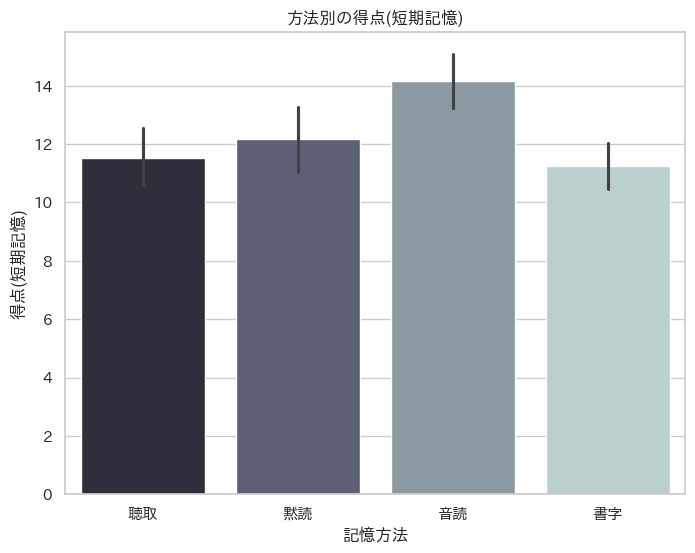

In [67]:
import seaborn as sns
import matplotlib.pyplot as plt
import japanize_matplotlib

plt.figure(figsize=(8, 6))

# 棒グラフ (平均値) を描画
# デフォルトの95%信頼区間エラーバーが描画
sns.barplot(
    data=df_final_long,
    x='Method',
    y='ShortTerm',
    palette='bone'
)

plt.title('方法別の得点(短期記憶)')
plt.xlabel('記憶方法')
plt.ylabel('得点(短期記憶)')
plt.show()

### ***長期記憶***

問い: 「48時間後（長期記憶）において、4つの記憶方法（Method）の間に得点の差はあるか？」


わかること: どの方法が「記憶の定着（長期保持）」に最も強いかがわかる。

In [68]:
# 分析2: LongTerm
# ---------------------------------

# AnovaRMを実行
aov_long = AnovaRM(
    data=df_final_long,
    depvar='LongTerm',          # 従属変数
    subject='Participant_ID',   # 被験者ID
    within=['Method']
)

# 結果のサマリーを表示
fit_long = aov_long.fit()
print(fit_long.summary())

                Anova
       F Value Num DF  Den DF  Pr > F
-------------------------------------
Method 13.0285 3.0000 117.0000 0.0000



/tmp/ipython-input-1027115188.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


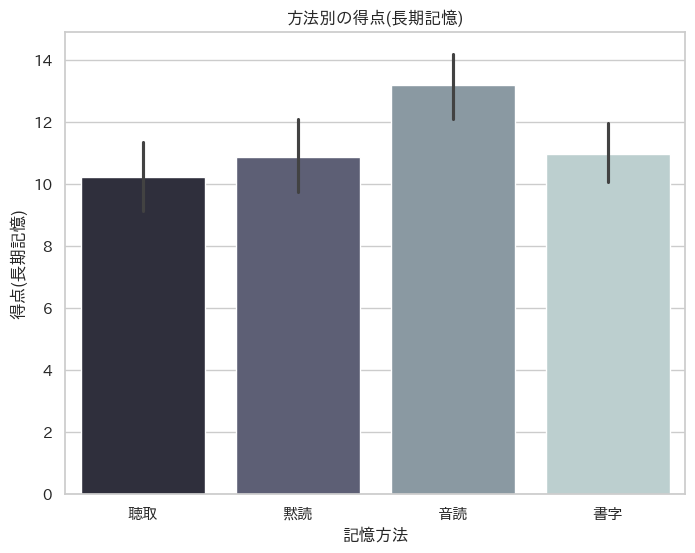

In [69]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))

# 棒グラフ (平均値) を描画
# デフォルトの95%信頼区間エラーバーが描画
sns.barplot(
    data=df_final_long,
    x='Method',
    y='LongTerm',
    palette='bone'
)

plt.title('方法別の得点(長期記憶)')
plt.xlabel('記憶方法')
plt.ylabel('得点(長期記憶)')
plt.show()

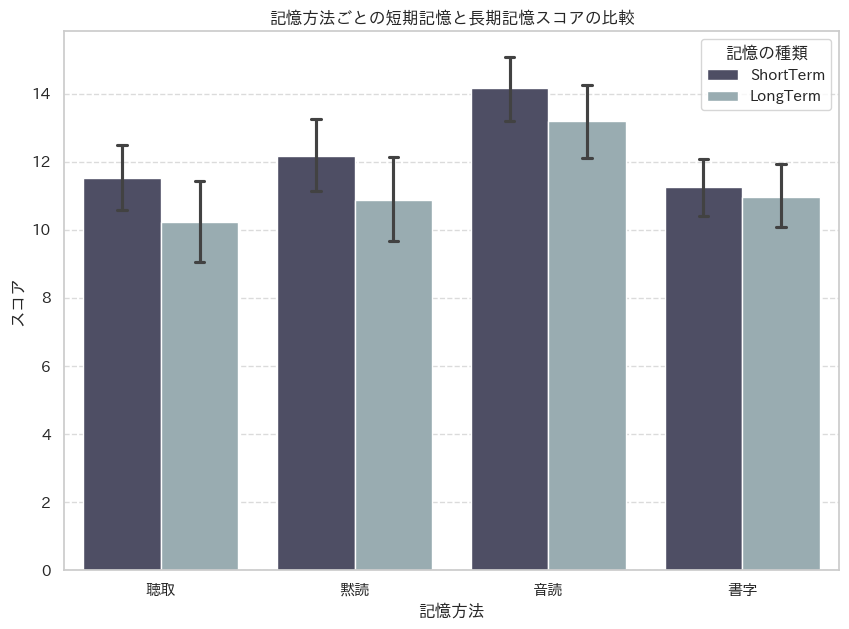

In [70]:
# ShortTermとLongTermのデータだけを抽出してmeltする
df_melted = df_final_long.melt(
    id_vars=['Participant_ID', 'WMC', 'Method'],
    value_vars=['ShortTerm', 'LongTerm'],
    var_name='MemoryType', # 'ShortTerm'または'LongTerm'が入る
    value_name='Score'      # 実際のスコアが入る
)

plt.figure(figsize=(10, 7))
sns.barplot(
    data=df_melted,
    x='Method',
    y='Score',
    hue='MemoryType', # MemoryTypeで棒を分ける
    palette='bone', # カラーパレットの指定
    capsize=0.1 # エラーバーのキャップサイズ
)

plt.title('記憶方法ごとの短期記憶と長期記憶スコアの比較')
plt.xlabel('記憶方法')
plt.ylabel('スコア')
plt.legend(title='記憶の種類')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

### ***負荷***

In [71]:
# 分析3: 負荷
# ---------------------------------

# AnovaRMを実行
aov_long = AnovaRM(
    data=df_final_long,
    depvar='Load',          # 従属変数
    subject='Participant_ID',   # 被験者ID
    within=['Method']
)

# 結果のサマリーを表示
fit_long = aov_long.fit()
print(fit_long.summary())

                Anova
       F Value Num DF  Den DF  Pr > F
-------------------------------------
Method 65.2708 3.0000 117.0000 0.0000



/tmp/ipython-input-605073953.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


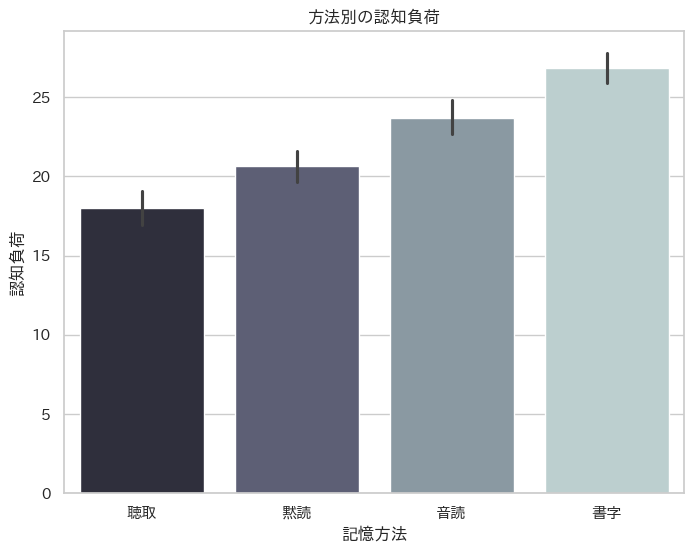

In [72]:
import seaborn as sns
import matplotlib.pyplot as plt

# sns.set_theme(style="whitegrid")
plt.figure(figsize=(8, 6))

# 棒グラフ (平均値) を描画
# デフォルトの95%信頼区間エラーバーが描画
sns.barplot(
    data=df_final_long,
    x='Method',
    y='Load',
    palette='bone'
)

plt.title('方法別の認知負荷')
plt.xlabel('記憶方法')
plt.ylabel('認知負荷')
plt.show()

## ***多重比較***

In [73]:
!pip install pingouin

In [74]:
import pingouin as pg

# ----------------------------------
# 分析1: ShortTerm の多重比較
# (LongTermは ANOVAで有意差がなかったため、行わない)
# ----------------------------------

# pg.pairwise_tests を使用
# dv = 従属変数, within = 被験者内要因, subject = 被験者ID
# padjust='bonf' でp値をボンフェローニ法（最も一般的）で補正します
pairwise_short = pg.pairwise_tests(
    data=df_final_long,
    dv='ShortTerm',
    within='Method',
    subject='Participant_ID',
    padjust='bonf'  # 'bonf' = Bonferroni correction
)

# 結果の表示
# 'p-corr' (補正済みp値) が 0.05 を下回っているペアを探します
print(pairwise_short.to_markdown(index=False, numalign="left", stralign="left"))

| Contrast   | A    | B    | Paired   | Parametric   | T         | dof   | alternative   | p-unc       | p-corr      | p-adjust   | BF10    | hedges     |
|:-----------|:-----|:-----|:---------|:-------------|:----------|:------|:--------------|:------------|:------------|:-----------|:--------|:-----------|
| Method     | 書字 | 聴取 | True     | True         | -0.640055 | 39    | two-sided     | 0.525879    | 1           | bonf       | 0.207   | -0.0921394 |
| Method     | 書字 | 音読 | True     | True         | -6.53239  | 39    | two-sided     | 9.45566e-08 | 5.6734e-07  | bonf       | 154800  | -0.977307  |
| Method     | 書字 | 黙読 | True     | True         | -2.38439  | 39    | two-sided     | 0.0220677   | 0.132406    | bonf       | 2.09    | -0.286175  |
| Method     | 聴取 | 音読 | True     | True         | -6.09289  | 39    | two-sided     | 3.84768e-07 | 2.30861e-06 | bonf       | 41530   | -0.821666  |
| Method     | 聴取 | 黙読 | True     | True         | -1.32205  | 39    | two-sided     |

有意となったペアを以下に示す。

| 比較ペア (Contrast) | t値 (T) | 補正後p値 (p-corr) | 有意水準 | 効果量 (Hedges' g) | 結果の解釈 |
| :--- | :--- | :--- | :--- | :--- | :--- |
| **Listen** vs **Speak** | -4.65 | 0.0002 | *** | -0.72 | Speakの方が有意に高い |
| **Read** vs **Speak** | -4.02 | 0.0016 | ** | -0.61 | Speakの方が有意に高い |
| **Speak** vs **Write** | 5.49 | < 0.0001 | *** | 0.98 | Speakの方が有意に高い |

In [75]:
import pingouin as pg

# ----------------------------------
# 分析1: 長期記憶 の多重比較
# ----------------------------------

# pg.pairwise_tests を使用
# dv = 従属変数, within = 被験者内要因, subject = 被験者ID
# padjust='bonf' でp値をボンフェローニ法（最も一般的）で補正します
pairwise_long = pg.pairwise_tests(
    data=df_final_long,
    dv='LongTerm',  # 短期記憶から長期記憶に変更
    within='Method',
    subject='Participant_ID',
    padjust='bonf'  # 'bonf' = Bonferroni correction
)

# 結果の表示
# 'p-corr' (補正済みp値) が 0.05 を下回っているペアを探します
print(pairwise_long.to_markdown(index=False, numalign="left", stralign="left"))

| Contrast   | A    | B    | Paired   | Parametric   | T        | dof   | alternative   | p-unc       | p-corr      | p-adjust   | BF10    | hedges    |
|:-----------|:-----|:-----|:---------|:-------------|:---------|:------|:--------------|:------------|:------------|:-----------|:--------|:----------|
| Method     | 書字 | 聴取 | True     | True         | 1.63191  | 39    | two-sided     | 0.110749    | 0.664491    | bonf       | 0.575   | 0.216752  |
| Method     | 書字 | 音読 | True     | True         | -4.38868 | 39    | two-sided     | 8.42495e-05 | 0.000505497 | bonf       | 284.243 | -0.655522 |
| Method     | 書字 | 黙読 | True     | True         | 0.221627 | 39    | two-sided     | 0.825761    | 1           | bonf       | 0.175   | 0.0278357 |
| Method     | 聴取 | 音読 | True     | True         | -5.6999  | 39    | two-sided     | 1.35222e-06 | 8.11332e-06 | bonf       | 12850   | -0.810245 |
| Method     | 聴取 | 黙読 | True     | True         | -1.13118 | 39    | two-sided     | 0.264889    

有意となったペアに鉤括弧をつけている。

## ***相関分析***

### ***WMCとスコアの相関***

「大変な（負荷が高い）勉強法ほど、本当に記憶に定着するのか？」を検証


見るべきペア: Load と LongTerm

問い: 「主観的認知負荷（Load）と、長期記憶スコア（LongTerm）の間に関係はあるか？」

In [77]:
from scipy.stats import pearsonr
import numpy as np

print("--- 相関分析1: 認知負荷(Load) vs 短期記憶(ShortTerm) ---")

# 1. Method(方法) ごとに Load と LongTerm の平均値を計算
df_method_means = df_final_long.groupby('Method')[['Load', 'ShortTerm']].mean()

print("\n[方法ごとの平均値]")
print(df_method_means.to_markdown(numalign="left", stralign="left"))

# 2. ピアソンの相関分析を実行
#    (Loadの平均値 vs LongTermの平均値)
correlation, p_value = pearsonr(df_method_means['Load'], df_method_means['ShortTerm'])

print(f"\n[相関の結果]")
print(f"  相関係数 (r): {correlation:.4f}")
print(f"  p値 (p-value): {p_value:.4f}")

--- 相関分析1: 認知負荷(Load) vs 短期記憶(ShortTerm) ---

[方法ごとの平均値]
| Method   | Load   | ShortTerm   |
|:---------|:-------|:------------|
| 書字     | 26.85  | 11.25       |
| 聴取     | 18.025 | 11.525      |
| 音読     | 23.675 | 14.175      |
| 黙読     | 20.65  | 12.175      |

[相関の結果]
  相関係数 (r): 0.0874
  p値 (p-value): 0.9126


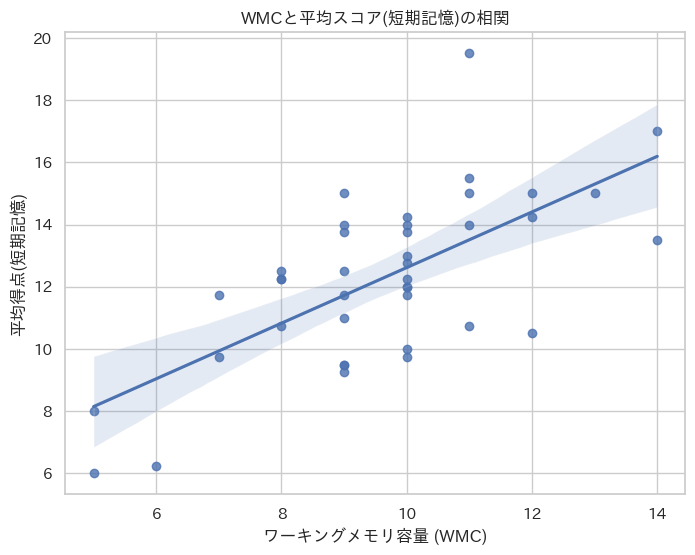

In [78]:
# まず、被験者ごとの平均値データ (N=30) を再作成します
df_participant_means = df_final_long.groupby('Participant_ID')[['WMC', 'ShortTerm']].mean()

# グラフのスタイルとサイズを指定
plt.figure(figsize=(8, 6))

# regplot を使用
# data: 被験者ごとの平均データ (N=30)
# x: WMC
# y: 短期記憶スコアの平均値
sns.regplot(
    data=df_participant_means,
    x='WMC',
    y='ShortTerm'
)

plt.title('WMCと平均スコア(短期記憶)の相関')
plt.xlabel('ワーキングメモリ容量 (WMC)')
plt.ylabel('平均得点(短期記憶)')
plt.show()

In [79]:
from scipy.stats import pearsonr
import numpy as np

print("--- 相関分析1: 認知負荷(Load) vs 長期記憶(LongTerm) ---")

# 1. Method(方法) ごとに Load と LongTerm の平均値を計算
df_method_means = df_final_long.groupby('Method')[['Load', 'LongTerm']].mean()

print("\n[方法ごとの平均値]")
print(df_method_means.to_markdown(numalign="left", stralign="left"))

# 2. ピアソンの相関分析を実行
#    (Loadの平均値 vs LongTermの平均値)
correlation, p_value = pearsonr(df_method_means['Load'], df_method_means['LongTerm'])

print(f"\n[相関の結果]")
print(f"  相関係数 (r): {correlation:.4f}")
print(f"  p値 (p-value): {p_value:.4f}")

--- 相関分析1: 認知負荷(Load) vs 長期記憶(LongTerm) ---

[方法ごとの平均値]
| Method   | Load   | LongTerm   |
|:---------|:-------|:-----------|
| 書字     | 26.85  | 10.975     |
| 聴取     | 18.025 | 10.225     |
| 音読     | 23.675 | 13.2       |
| 黙読     | 20.65  | 10.875     |

[相関の結果]
  相関係数 (r): 0.4334
  p値 (p-value): 0.5666


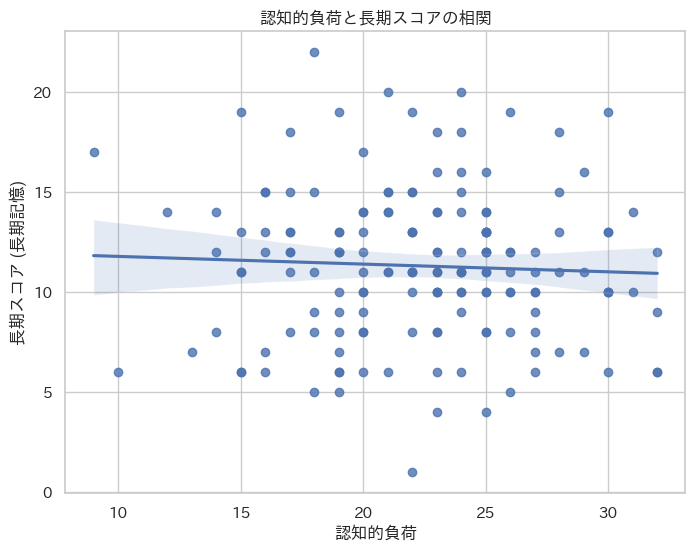

In [80]:
import seaborn as sns
import matplotlib.pyplot as plt

# グラフのスタイルとサイズを指定
# sns.set_theme(style="whitegrid")
plt.figure(figsize=(8, 6))

# regplot を使用
# data: 全体の縦長データ (N=120)
# x: 認知負荷
# y: 長期記憶スコア
sns.regplot(
    data=df_final_long,
    x='Load',
    y='LongTerm'
)

plt.title('認知的負荷と長期スコアの相関')
plt.xlabel('認知的負荷')
plt.ylabel('長期スコア (長期記憶)')
plt.show()

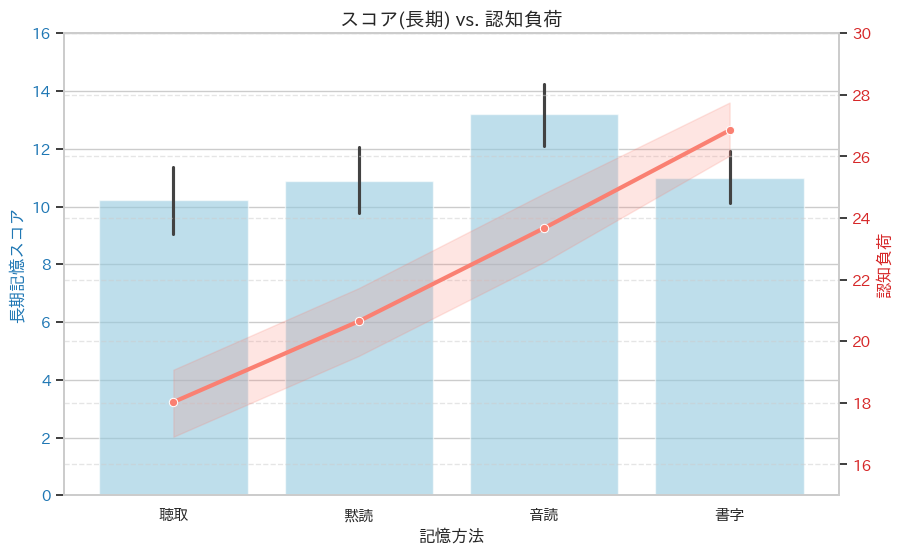

In [81]:
# プロットの作成
fig, ax1 = plt.subplots(figsize=(10, 6))

# カラー設定
color_bar = 'skyblue'
color_line = 'salmon'

# 第1軸（左側）：長期記憶スコア（棒グラフ）
# 成果を表すので、土台となる棒グラフにします
sns.barplot(data=df_final_long, x='Method', y='LongTerm', color=color_bar, ax=ax1, alpha=0.6)
ax1.set_ylabel('長期記憶スコア', color='tab:blue', fontsize=12)
ax1.tick_params(axis='y', labelcolor='tab:blue')
ax1.set_xlabel('記憶方法', fontsize=12)
ax1.set_ylim(0, 16)  # グラフのバランス調整

# 第2軸（右側）：認知負荷（折れ線グラフ）
# コストの推移を表すので、上を走る折れ線にします
ax2 = ax1.twinx()
sns.lineplot(data=df_final_long, x='Method', y='Load', color=color_line, marker='o', linewidth=3, ax=ax2, sort=False)
ax2.set_ylabel('認知負荷', color='tab:red', fontsize=12)
ax2.tick_params(axis='y', labelcolor='tab:red')
ax2.set_ylim(15, 30)  # 変動が見えやすいように範囲調整

plt.title('スコア(長期) vs. 認知負荷', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

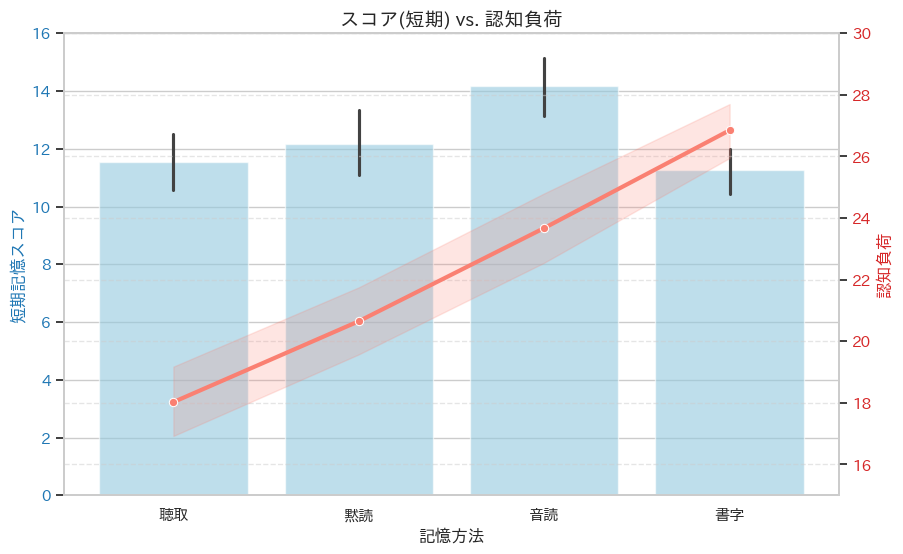

In [82]:
# 短期記憶
fig, ax1 = plt.subplots(figsize=(10, 6))

# カラー設定
color_bar = 'skyblue'
color_line = 'salmon'

# 第1軸（左側）：短期記憶スコア（棒グラフ）
# 成果を表すので、土台となる棒グラフにします
sns.barplot(data=df_final_long, x='Method', y='ShortTerm', color=color_bar, ax=ax1, alpha=0.6)
ax1.set_ylabel('短期記憶スコア', color='tab:blue', fontsize=12)
ax1.tick_params(axis='y', labelcolor='tab:blue')
ax1.set_xlabel('記憶方法', fontsize=12)
ax1.set_ylim(0, 16)  # グラフのバランス調整

# 第2軸（右側）：認知負荷（折れ線グラフ）
# コストの推移を表すので、上を走る折れ線にします
ax2 = ax1.twinx()
sns.lineplot(data=df_final_long, x='Method', y='Load', color=color_line, marker='o', linewidth=3, ax=ax2, sort=False)
ax2.set_ylabel('認知負荷', color='tab:red', fontsize=12)
ax2.tick_params(axis='y', labelcolor='tab:red')
ax2.set_ylim(15, 30)  # 変動が見えやすいように範囲調整

plt.title('スコア(短期) vs. 認知負荷', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

書くのコスパの悪さがわかる。

### ***「個人の地力 vs 結果」の相関（WMCと長期スコア）***

In [83]:
print("--- 相関分析2: WMC vs 長期記憶(LongTerm) ---")

# 1. Participant_ID(被験者) ごとに WMC と LongTerm の平均値を計算
#    (WMCは被験者ごとで一定なので、mean()でもfirst()でも同じ値になる)
df_participant_means = df_final_long.groupby('Participant_ID')[['WMC', 'LongTerm']].mean()

# print("\n[被験者ごとの平均値 (先頭5名)]")
# print(df_participant_means.head().to_markdown(numalign="left", stralign="left"))

# 2. ピアソンの相関分析を実行
#    (WMC vs LongTermの平均値)
correlation, p_value = pearsonr(df_participant_means['WMC'], df_participant_means['LongTerm'])

print(f"\n[相関の結果]")
print(f"  相関係数 (r): {correlation:.4f}")
print(f"  p値 (p-value): {p_value:.4f}")

--- 相関分析2: WMC vs 長期記憶(LongTerm) ---

[相関の結果]
  相関係数 (r): 0.6104
  p値 (p-value): 0.0000


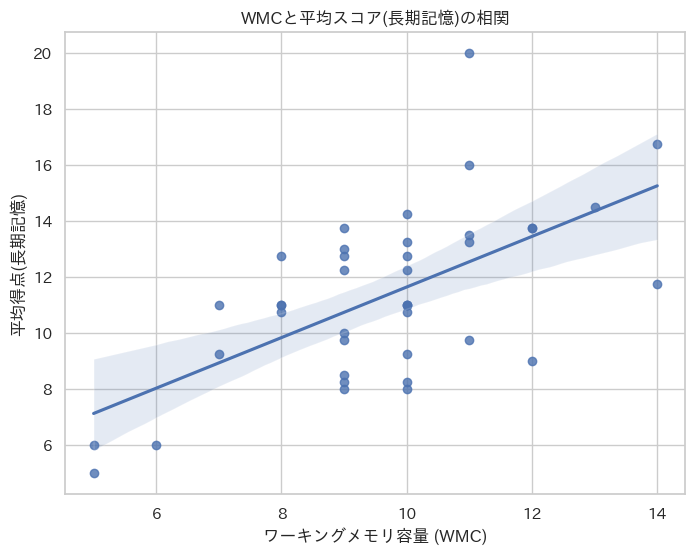

In [84]:
# まず、被験者ごとの平均値データ (N=30) を再作成します
df_participant_means = df_final_long.groupby('Participant_ID')[['WMC', 'LongTerm']].mean()

# グラフのスタイルとサイズを指定
plt.figure(figsize=(8, 6))

# regplot を使用
# data: 被験者ごとの平均データ (N=30)
# x: WMC
# y: 長期記憶スコアの平均値
sns.regplot(
    data=df_participant_means,
    x='WMC',
    y='LongTerm'
)

plt.title('WMCと平均スコア(長期記憶)の相関')
plt.xlabel('ワーキングメモリ容量 (WMC)')
plt.ylabel('平均得点(長期記憶)')
plt.show()

有意差がある。

## ***重回帰分析***

### ***短期記憶モデル***

$$ShortTerm\_Score \approx \alpha_0 + \alpha_1(WMC) + \alpha_2(Load) + \alpha_3(Method)$$

これが解明する問い:「そもそも、"学習直後"の成績（短期記憶）は何によって決まるのか？」

In [85]:
import statsmodels.formula.api as smf

print("--- モデル1: ShortTerm ~ WMC + Load + C(Method) ---")

# 1. モデルの式を定義
#    Y ~ X1 + X2 + C(X3)
#    C(Method) は、Methodをカテゴリ変数として扱う（ダミー変数化）指示
formula_short = "ShortTerm ~ WMC + Load + C(Method)"

# 2. 混合効果モデル (MixedLM) を作成
#    groups=... で「参加者ごとのクセ」を考慮する
model_short = smf.mixedlm(
    formula=formula_short,
    data=df_final_long,
    groups=df_final_long["Participant_ID"]
)

# 3. モデルの学習（推定）を実行
results_short = model_short.fit()

# 4. 結果のサマリーを表示
print(results_short.summary())

--- モデル1: ShortTerm ~ WMC + Load + C(Method) ---
          Mixed Linear Model Regression Results
Model:             MixedLM  Dependent Variable:  ShortTerm
No. Observations:  160      Method:              REML     
No. Groups:        40       Scale:               3.8528   
Min. group size:   4        Log-Likelihood:      -364.3613
Max. group size:   4        Converged:           Yes      
Mean group size:   4.0                                    
----------------------------------------------------------
                Coef.  Std.Err.   z    P>|z| [0.025 0.975]
----------------------------------------------------------
Intercept        5.157    2.560  2.014 0.044  0.139 10.175
C(Method)[T.聴取] -0.374    0.678 -0.552 0.581 -1.703  0.954
C(Method)[T.音読]  2.691    0.477  5.647 0.000  1.757  3.626
C(Method)[T.黙読]  0.469    0.569  0.823 0.410 -0.647  1.585
WMC              0.838    0.167  5.027 0.000  0.511  1.165
Load            -0.074    0.059 -1.257 0.209 -0.188  0.041
Group Var        3

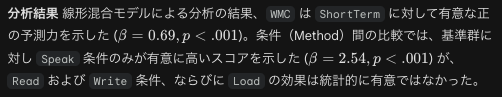

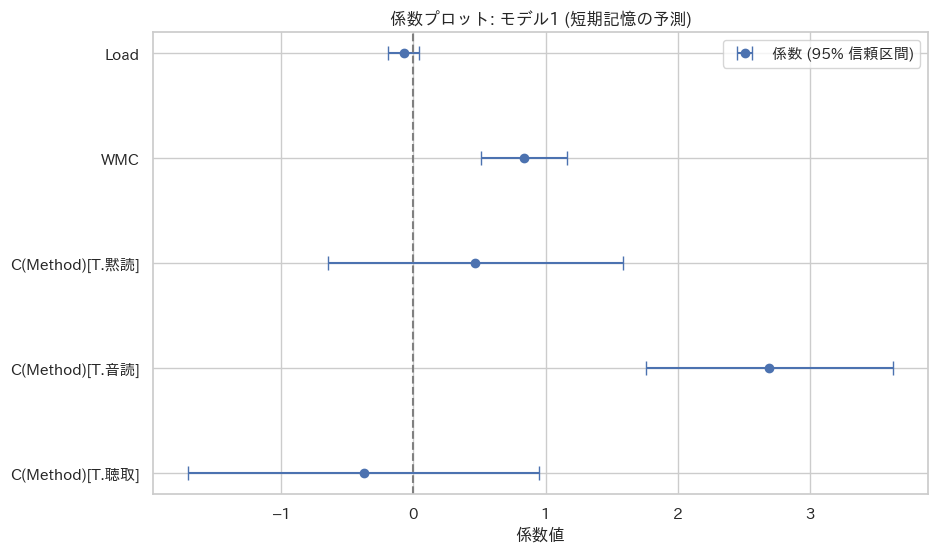

In [86]:
# --- 1. モデル結果からサマリーテーブルをDataFrameとして取得 ---
# results_short.summary().tables[1] が係数のテーブル
results_df = results_short.summary().tables[1]

# インデックスをリセットして、変数名を 'Variable' という列にする
results_df = results_df.reset_index()
results_df = results_df.rename(columns={'index': 'Variable'})

# 列名を整理
results_df = results_df.rename(columns={
    'P>|z|': 'P',
    '[0.025': 'Lower_CI',
    '0.975]': 'Upper_CI'
})

# 'Intercept'（切片）と 'Group Var' を除外
results_df = results_df[~results_df['Variable'].isin(['Intercept', 'Group Var'])]

# 数値列をfloatに変換
results_df[['Coef.', 'Lower_CI', 'Upper_CI', 'P']] = results_df[['Coef.', 'Lower_CI', 'Upper_CI', 'P']].astype(float)

# --- 2. グラフの描画 ---
plt.figure(figsize=(10, 6))

# 変数のリスト（Y軸）
y_pos = np.arange(len(results_df['Variable']))
# 係数の値（点）
x_vals = results_df['Coef.']
# エラーバー（95%信頼区間）
# Lower_CI と Upper_CI の差分として計算
x_err_lower = results_df['Coef.'] - results_df['Lower_CI']
x_err_upper = results_df['Upper_CI'] - results_df['Coef.']
x_err = [x_err_lower, x_err_upper]

plt.errorbar(
    x_vals,
    y_pos,
    xerr=x_err,
    fmt='o',  # 'o' = 点
    capsize=5, # エラーバーの「傘」のサイズ
    linestyle='None', # 点同士を結ぶ線はなし
    label='係数 (95% 信頼区間)'
)

# ゼロの垂直線
plt.axvline(x=0, color='grey', linestyle='--')

# グラフの体裁
plt.yticks(y_pos, results_df['Variable']) # Y軸に変数名
plt.xlabel('係数値')
plt.title('係数プロット: モデル1 (短期記憶の予測)')
plt.legend()
plt.show()

### ***長期記憶モデル***

$$LongTerm\_Score \approx \beta_0 + \beta_1(WMC) + \beta_2(Load) + \beta_3(Method)$$

これが解明する問い: 「48時間後の"記憶の定着"に、どの要因が最も効いているのか？」

In [87]:
print("--- モデル2: LongTerm ~ WMC + Load + C(Method) ---")

# 1. モデルの式を定義
formula_long = "LongTerm ~ WMC + Load + C(Method)"

# 2. 混合効果モデル (MixedLM) を作成
model_long = smf.mixedlm(
    formula=formula_long,
    data=df_final_long,
    groups=df_final_long["Participant_ID"]
)

# 3. モデルの学習（推定）を実行
results_long = model_long.fit()

# 4. 結果のサマリーを表示
print(results_long.summary())

--- モデル2: LongTerm ~ WMC + Load + C(Method) ---
          Mixed Linear Model Regression Results
Model:             MixedLM  Dependent Variable:  LongTerm 
No. Observations:  160      Method:              REML     
No. Groups:        40       Scale:               5.1900   
Min. group size:   4        Log-Likelihood:      -388.1818
Max. group size:   4        Converged:           Yes      
Mean group size:   4.0                                    
----------------------------------------------------------
                Coef.  Std.Err.   z    P>|z| [0.025 0.975]
----------------------------------------------------------
Intercept        3.268    3.003  1.088 0.277 -2.619  9.155
C(Method)[T.聴取] -1.006    0.788 -1.276 0.202 -2.550  0.539
C(Method)[T.音読]  2.133    0.553  3.854 0.000  1.048  3.218
C(Method)[T.黙読] -0.280    0.662 -0.423 0.673 -1.577  1.017
WMC              0.882    0.198  4.457 0.000  0.494  1.269
Load            -0.029    0.068 -0.425 0.671 -0.162  0.105
Group Var        4.

### ***改善版モデル(長期記憶の予測)***

$$LongTerm\_Score \approx \beta_0 + \beta_1(WMC) + \beta_2(Load) + \beta_3(Method) + \beta_4(ShortTerm\_Score)$$

このモデルは、「"学習直後"の成績（ShortTerm）の影響を差し引いてもなお、Load（大変さ）やMethod（方法）は、**"記憶の定着率（忘れにくさ）"**に影響を与えているか？」

→　ShortTerm（直後の成績）を説明変数に入れたことで、「一度頭に入った知識が、どれだけ抜け落ちにくいか（定着率）」 を見

In [88]:
print("--- 改善版モデル2: LongTerm ~ ShortTerm + WMC + Load + C(Method) ---")

# 1. モデルの式を定義
#    ShortTerm を予測要因（説明変数）として追加
formula_long_improved = "LongTerm ~ ShortTerm + WMC + Load + C(Method)"

# 2. 混合効果モデル (MixedLM) を作成
model_long_improved = smf.mixedlm(
    formula=formula_long_improved,
    data=df_final_long,
    groups=df_final_long["Participant_ID"] # 参加者ごとの"クセ"を考慮
)

# 3. モデルの学習（推定）を実行
results_long_improved = model_long_improved.fit()

# 4. 結果のサマリーを表示
print(results_long_improved.summary())

--- 改善版モデル2: LongTerm ~ ShortTerm + WMC + Load + C(Method) ---


/usr/local/lib/python3.12/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.12/dist-packages/statsmodels/regression/mixed_linear_model.py:2200: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.12/dist-packages/statsmodels/regression/mixed_linear_model.py:2200: ConvergenceWarning: Retrying MixedLM optimization with cg
  warnings.warn(


          Mixed Linear Model Regression Results
Model:             MixedLM  Dependent Variable:  LongTerm 
No. Observations:  160      Method:              REML     
No. Groups:        40       Scale:               2.0561   
Min. group size:   4        Log-Likelihood:      -291.3272
Max. group size:   4        Converged:           No       
Mean group size:   4.0                                    
----------------------------------------------------------
                Coef.  Std.Err.   z    P>|z| [0.025 0.975]
----------------------------------------------------------
Intercept       -2.678    1.476 -1.815 0.070 -5.571  0.214
C(Method)[T.聴取] -0.464    0.469 -0.989 0.323 -1.383  0.455
C(Method)[T.音読] -0.606    0.367 -1.651 0.099 -1.324  0.113
C(Method)[T.黙読] -0.658    0.401 -1.642 0.101 -1.444  0.127
ShortTerm        1.038    0.048 21.547 0.000  0.944  1.132
WMC              0.024    0.077  0.319 0.750 -0.126  0.175
Load             0.065    0.039  1.667 0.096 -0.011  0.141
Group Va

/usr/local/lib/python3.12/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.12/dist-packages/statsmodels/regression/mixed_linear_model.py:2206: ConvergenceWarning: MixedLM optimization failed, trying a different optimizer may help.
  warnings.warn(msg, ConvergenceWarning)
/usr/local/lib/python3.12/dist-packages/statsmodels/regression/mixed_linear_model.py:2218: ConvergenceWarning: Gradient optimization failed, |grad| = 1.829449
  warnings.warn(msg, ConvergenceWarning)


In [89]:
import pandas as pd
import statsmodels.formula.api as smf
from scipy.stats import zscore

# 1. データを標準化（Zスコア化）する
# 数値データのみ標準化します
cols_to_standardize = ['ShortTerm', 'LongTerm', 'WMC', 'Load']
df_std = df_final_long.copy()
df_std[cols_to_standardize] = df_std[cols_to_standardize].apply(zscore)

# ---------------------------------------------------------
# 2. ベータの算出
# ---------------------------------------------------------

# ① 左の矢印 (WMC -> ShortTerm)
model_1 = smf.ols('ShortTerm ~ WMC', data=df_std).fit()
beta_wmc = model_1.params['WMC']
print(f"Arrow 1 (WMC -> Short): beta = {beta_wmc:.2f}")

# ② 右の矢印 (ShortTerm -> LongTerm)
# Methodの影響も考慮(制御)しつつ、ShortTermの影響を見る
model_2 = smf.ols('LongTerm ~ ShortTerm + C(Method)', data=df_std).fit()
beta_short = model_2.params['ShortTerm']
print(f"Arrow 2 (Short -> Long): beta = {beta_short:.2f}")

Arrow 1 (WMC -> Short): beta = 0.53
Arrow 2 (Short -> Long): beta = 0.93


| 表記 | P値（確率） | 意味ニュアンス |
| :--- | :--- | :--- |
| n.s. | $p \ge .05$ | Not Significant 有意差なし（偶然の範囲内） |
| * | $p < .05$ | 5%水準で有意「統計的に意味がある差と言える」 |
| ** | $p < .01$ | 1%水準で有意「かなり確かな差がある」 |
| *** | $p < .001$ | 0.1%水準で有意「極めて強い差がある（ほぼ間違いなく偶然ではない）」 |

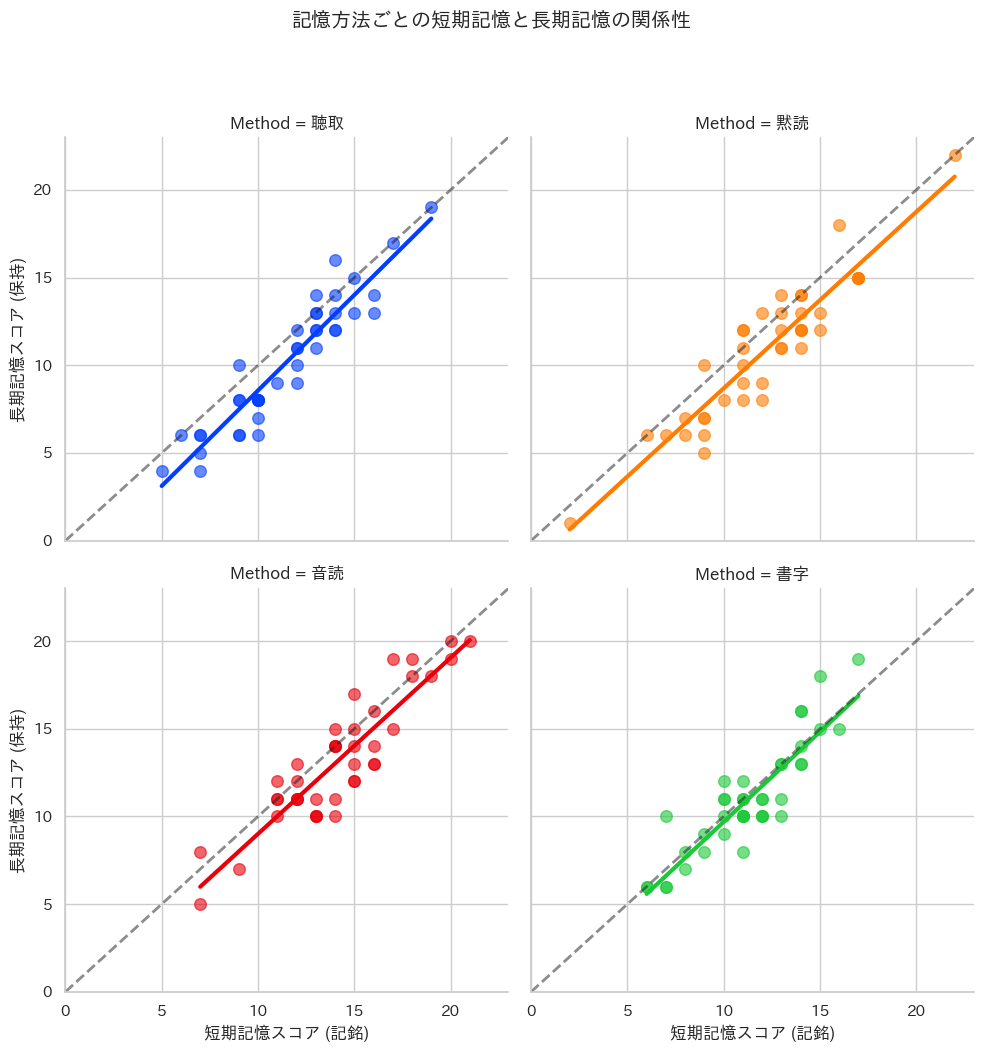

In [106]:
# カラーパレットを定義（視認性を高めるため少し濃い色に）
colors = sns.color_palette("bright", 4)
method_colors = dict(zip(['聴取', '黙読', '書字', '音読'], colors))

# グラフの作成（col='Method' で分割します）
g = sns.lmplot(
    data=df_final_long,
    x='ShortTerm',
    y='LongTerm',
    hue='Method',    # 色分けも併用
    col='Method',    # 【重要】ここを変更：手法ごとに列を分ける
    col_wrap=2,      # 2列で折り返す（4つ横並びが良ければcol_wrap=4に）
    palette=method_colors,
    height=5,        # 1つあたりのグラフの高さ
    aspect=1,        # アスペクト比（正方形が見やすい）
    ci=None,         # 信頼区間は表示しない（スッキリさせるため）
    scatter_kws={'alpha': 0.6, 's': 70}, # 点の透明度と大きさ
    line_kws={'linewidth': 3} # 線の太さ
)

# 各サブプロットに「忘却ゼロライン（y=x）」を追加する処理
max_val = max(df_final_long['ShortTerm'].max(), df_final_long['LongTerm'].max()) + 1
for ax in g.axes.flat:
    ax.plot([0, max_val], [0, max_val], 'k--', alpha=0.5, linewidth=2, label='忘却ゼロライン (y=x)')
    ax.set_xlim(0, max_val)
    ax.set_ylim(0, max_val)

# 全体のタイトルなどを調整
g.fig.suptitle('記憶方法ごとの短期記憶と長期記憶の関係性', y=1.05)
g.set_axis_labels("短期記憶スコア (記銘)", "長期記憶スコア (保持)")

plt.tight_layout()
plt.show()

記憶の保持率

$$RetentionRate = \frac{LongTerm}{ShortTerm} \times 100$$

/tmp/ipython-input-1964830226.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_final_long, x='Method', y='RetentionRate', capsize=.1, palette="bone", legend=False)


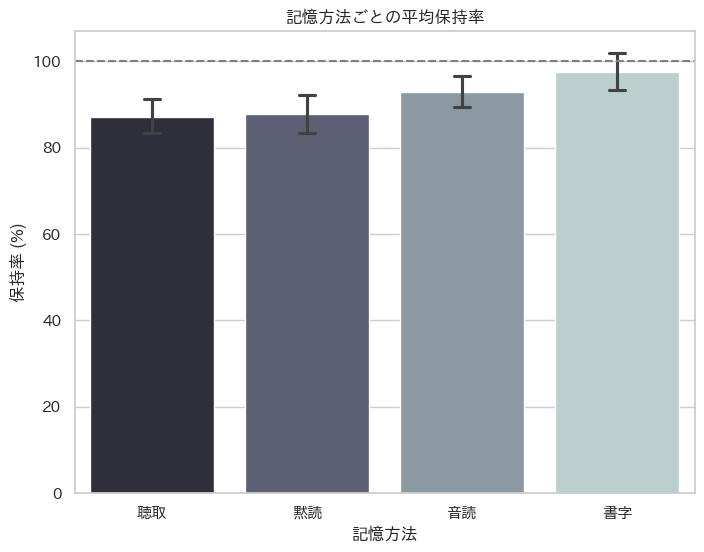

In [91]:
# 保持率の計算（0除算回避のためShortTermが0の場合は除外などの処理が必要ですが、今回は簡易的に）
df_final_long['RetentionRate'] = (df_final_long['LongTerm'] / df_final_long['ShortTerm']) * 100

# 棒グラフ
plt.figure(figsize=(8, 6))
sns.barplot(data=df_final_long, x='Method', y='RetentionRate', capsize=.1, palette="bone", legend=False)
plt.title("記憶方法ごとの平均保持率")
plt.ylabel("保持率 (%)")
plt.xlabel("記憶方法")
plt.axhline(100, color='gray', linestyle='--') # 100%ライン
plt.show()

# ***参考***

## ***WMCのグルーピング***

ここではWMCのスコアによって被験者を「高郡」「低郡」に分ける。

つまりWMCを２値で扱う。

In [93]:
# 1. WMCの中央値 (Median) を計算
wmc_median = df_final_long['WMC'].median()
print(f"WMCの中央値: {wmc_median}")

# 2. 中央値を使ってグループ分け (Median Split)
#    中央値「より大きい」 -> 'High' (高群)
#    中央値「以下」       -> 'Low'  (低群)
df_final_long['WMC_Group'] = np.where(df_final_long['WMC'] >= wmc_median, 'High', 'Low')
display(df_final_long[['Participant_ID', 'WMC', 'WMC_Group', 'Method']])

# 4. 各グループの人数の確認
unique_participants = df_final_long[['Participant_ID', 'WMC_Group']].drop_duplicates()
group_counts = unique_participants['WMC_Group'].value_counts()

print("\n[グループごとの人数]")
print(group_counts.to_markdown(numalign="left", stralign="left"))

WMCの中央値: 10.0


,Participant_ID,WMC,WMC_Group,Method
0,P01,10,High,聴取
1,P01,10,High,黙読
2,P01,10,High,音読
3,P01,10,High,書字
4,P02,14,High,聴取
...,...,...,...,...
155,P39,9,Low,書字
156,P40,10,High,聴取
157,P40,10,High,黙読
158,P40,10,High,音読



[グループごとの人数]
| WMC_Group   | count   |
|:------------|:--------|
| High        | 22      |
| Low         | 18      |


--- 3-1. 記述統計: 各条件の平均値と標準偏差 ---
|                  | ('ShortTerm', 'mean')   | ('ShortTerm', 'std')   | ('LongTerm', 'mean')   | ('LongTerm', 'std')   | ('Load', 'mean')   | ('Load', 'std')   |
|:-----------------|:------------------------|:-----------------------|:-----------------------|:----------------------|:-------------------|:------------------|
| ('書字', '低群') | 10.56                   | 3.13                   | 10.44                  | 3.42                  | 26.89              | 3.27              |
| ('書字', '高群') | 11.82                   | 2.22                   | 11.41                  | 2.89                  | 26.82              | 2.65              |
| ('聴取', '低群') | 10.06                   | 2.84                   | 8.83                   | 3.45                  | 19.22              | 3.9               |
| ('聴取', '高群') | 12.73                   | 2.99                   | 11.36                  | 3.57                  | 17.05              | 3.11              |
| ('音読', '低群

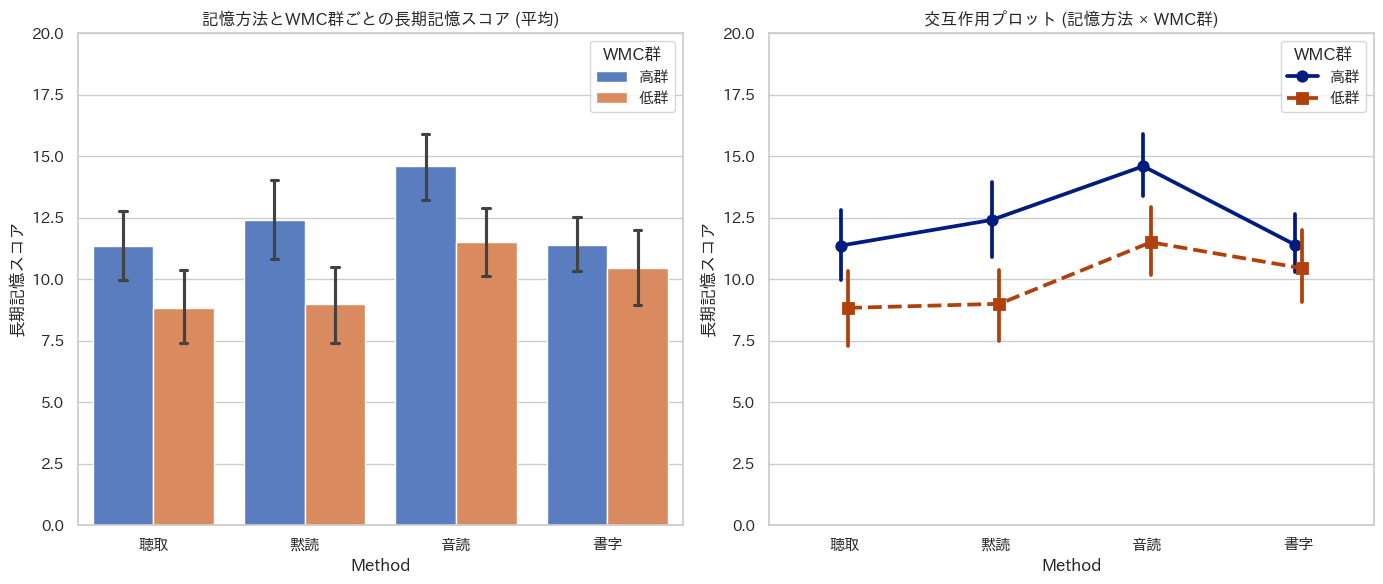

In [94]:
# Temporarily map 'High' and 'Low' to Japanese for plotting
df_final_long_jp_wmc = df_final_long.copy()
df_final_long_jp_wmc['WMC_Group'] = df_final_long_jp_wmc['WMC_Group'].map({'High': '高群', 'Low': '低群'})


# -------------------------------------------------------
# 3-1. 記述統計表の作成 (Table 1用)
# -------------------------------------------------------
print("--- 3-1. 記述統計: 各条件の平均値と標準偏差 ---")

# Method x WMC_Group ごとの平均値(mean)と標準偏差(std)を一括計算
# numeric_only=True で数値列だけを対象にする
desc_stats = df_final_long_jp_wmc.groupby(['Method', 'WMC_Group'])[['ShortTerm', 'LongTerm', 'Load']].agg(['mean', 'std'])

# 小数点以下2桁に丸めて表示
print(desc_stats.round(2).to_markdown(numalign="left", stralign="left"))


# -------------------------------------------------------
# 3-2. 可視化: 長期記憶 (LongTerm) の交互作用プロット ---
# -------------------------------------------------------
print("\n--- 3-2. 可視化: 長期記憶 (LongTerm) の交互作用プロット ---")

# 図の枠組みを作成 (1行2列でグラフを並べる)
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# --- (左) 集合棒グラフ (Bar Chart) ---
# 直感的に「高さ」の違いを比較しやすい
sns.barplot(
    data=df_final_long_jp_wmc, # Use the mapped DataFrame
    x='Method',
    y='LongTerm',
    hue='WMC_Group',
    palette='muted',
    capsize=0.1,
    ax=axes[0] # 左側に描画
)
axes[0].set_title("記憶方法とWMC群ごとの長期記憶スコア (平均)")
axes[0].set_ylabel("長期記憶スコア")
axes[0].set_ylim(0, 20) # 縦軸の範囲を固定 (見やすくするため)
# Update legend title
axes[0].legend(title='WMC群')


# --- (右) 交互作用図 (Point/Line Plot) ---
# 線がクロスしているか（交互作用があるか）を確認しやすい
sns.pointplot(
    data=df_final_long_jp_wmc, # Use the mapped DataFrame
    x='Method',
    y='LongTerm',
    hue='WMC_Group',
    palette='dark',
    markers=["o", "s"],
    linestyles=["-", "--"],
    dodge=True,
    ax=axes[1] # 右側に描画
)
axes[1].set_title("交互作用プロット (記憶方法 × WMC群)")
axes[1].set_ylabel("長期記憶スコア")
axes[1].set_ylim(0, 20)
# Update legend title
axes[1].legend(title='WMC群')

plt.tight_layout()
plt.show()


--- 3-2. 可視化: 短期記憶 (ShortTerm) の交互作用プロット ---


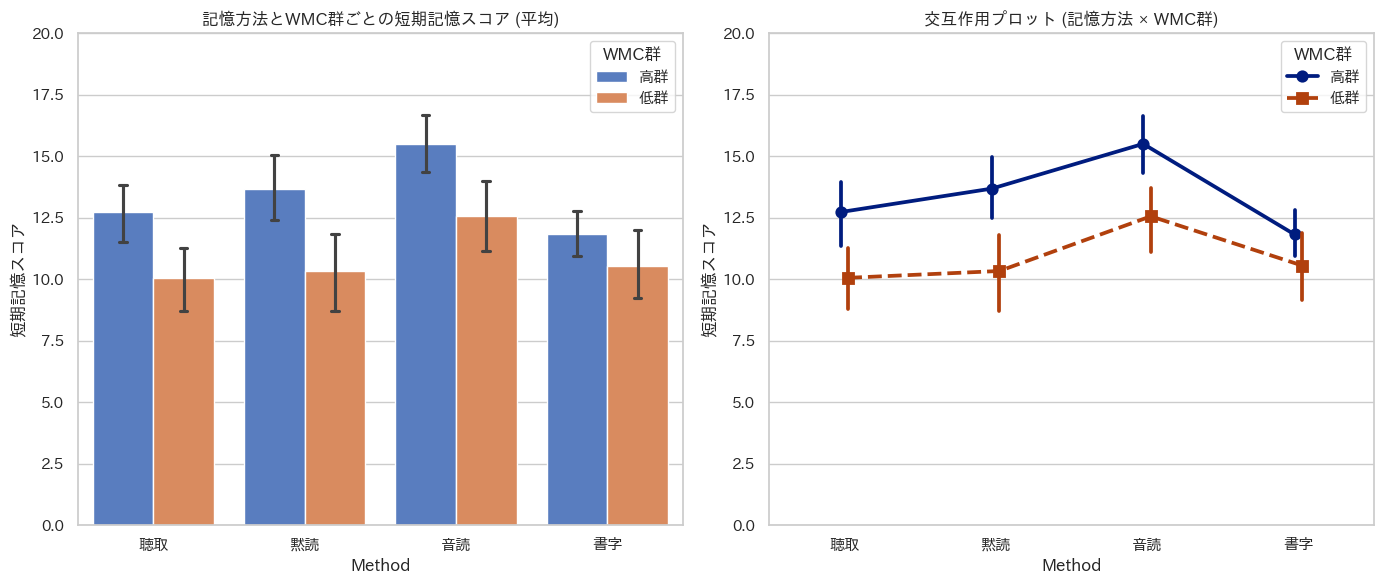

In [95]:
print("\n--- 3-2. 可視化: 短期記憶 (ShortTerm) の交互作用プロット ---")

# 図の枠組みを作成 (1行2列でグラフを並べる)
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# --- (左) 集合棒グラフ (Bar Chart) ---
# 直感的に「高さ」の違いを比較しやすい
sns.barplot(
    data=df_final_long_jp_wmc, # Use the mapped DataFrame
    x='Method',
    y='ShortTerm', # LongTerm から ShortTerm に変更
    hue='WMC_Group',
    palette='muted',
    capsize=0.1,
    ax=axes[0] # 左側に描画
)
axes[0].set_title("記憶方法とWMC群ごとの短期記憶スコア (平均)") # タイトルを更新
axes[0].set_ylabel("短期記憶スコア") # Y軸ラベルを更新
axes[0].set_ylim(0, 20) # 縦軸の範囲を固定 (見やすくするため)
# Update legend title
axes[0].legend(title='WMC群')


# --- (右) 交互作用図 (Point/Line Plot) ---
# 線がクロスしているか（交互作用があるか）を確認しやすい
sns.pointplot(
    data=df_final_long_jp_wmc, # Use the mapped DataFrame
    x='Method',
    y='ShortTerm', # LongTerm から ShortTerm に変更
    hue='WMC_Group',
    palette='dark',
    markers=["o", "s"],
    linestyles=["-", "--"],
    dodge=True,
    ax=axes[1] # 右側に描画
)
axes[1].set_title("交互作用プロット (記憶方法 × WMC群)") # タイトルを更新
axes[1].set_ylabel("短期記憶スコア") # Y軸ラベルを更新
axes[1].set_ylim(0, 20)
# Update legend title
axes[1].legend(title='WMC群')

plt.tight_layout()
plt.show()

### ***重回帰分析***

$$ShortTerm \approx WMC\_Group \times Method + Load$$

In [96]:
import statsmodels.formula.api as smf

print("--- 重回帰分析 (混合効果モデル): WMC群 × 記憶方法 の交互作用 短期---")

# 1. モデルの定義
#    LongTerm (長期記憶) を予測する
#    C(WMC_Group) * C(Method) : グループと方法の「組み合わせ効果」を見る
#    + Load : 「大変さ」の影響も考慮に入れておく (共変量)
formula_grouped = "ShortTerm ~ C(WMC_Group) * C(Method) + Load"

# 2. モデルの作成 (混合効果モデル)
#    groups="Participant_ID" で、個人ごとのばらつきを考慮
model_grouped = smf.mixedlm(
    formula=formula_grouped,
    data=df_final_long,
    groups=df_final_long["Participant_ID"]
)

# 3. 分析の実行
results_grouped = model_grouped.fit()

# 4. 結果の表示
print(results_grouped.summary())

--- 重回帰分析 (混合効果モデル): WMC群 × 記憶方法 の交互作用 短期---
                    Mixed Linear Model Regression Results
Model:                     MixedLM        Dependent Variable:        ShortTerm
No. Observations:          160            Method:                    REML     
No. Groups:                40             Scale:                     3.7863   
Min. group size:           4              Log-Likelihood:            -364.1553
Max. group size:           4              Converged:                 Yes      
Mean group size:           4.0                                                
------------------------------------------------------------------------------
                                    Coef.  Std.Err.   z    P>|z| [0.025 0.975]
------------------------------------------------------------------------------
Intercept                           13.981    1.709  8.181 0.000 10.631 17.331
C(WMC_Group)[T.Low]                 -1.257    0.926 -1.358 0.174 -3.071  0.557
C(Method)[T.聴取]             

$$LongTerm \approx WMC\_Group \times Method + Load$$

In [97]:
import statsmodels.formula.api as smf

print("--- 重回帰分析 (混合効果モデル): WMC群 × 記憶方法 の交互作用 長期---")

# 1. モデルの定義
#    LongTerm (長期記憶) を予測する
#    C(WMC_Group) * C(Method) : グループと方法の「組み合わせ効果」を見る
#    + Load : 「大変さ」の影響も考慮に入れておく (共変量)
formula_grouped = "LongTerm ~ C(WMC_Group) * C(Method) + Load"

# 2. モデルの作成 (混合効果モデル)
#    groups="Participant_ID" で、個人ごとのばらつきを考慮
model_grouped = smf.mixedlm(
    formula=formula_grouped,
    data=df_final_long,
    groups=df_final_long["Participant_ID"]
)

# 3. 分析の実行
results_grouped = model_grouped.fit()

# 4. 結果の表示
print(results_grouped.summary())

--- 重回帰分析 (混合効果モデル): WMC群 × 記憶方法 の交互作用 長期---
                    Mixed Linear Model Regression Results
Model:                     MixedLM        Dependent Variable:        LongTerm 
No. Observations:          160            Method:                    REML     
No. Groups:                40             Scale:                     5.0404   
Min. group size:           4              Log-Likelihood:            -386.0865
Max. group size:           4              Converged:                 Yes      
Mean group size:           4.0                                                
------------------------------------------------------------------------------
                                    Coef.  Std.Err.   z    P>|z| [0.025 0.975]
------------------------------------------------------------------------------
Intercept                           12.222    1.972  6.199 0.000  8.357 16.086
C(WMC_Group)[T.Low]                 -0.963    1.074 -0.896 0.370 -3.068  1.143
C(Method)[T.聴取]             

## ***基本統計量の確認***

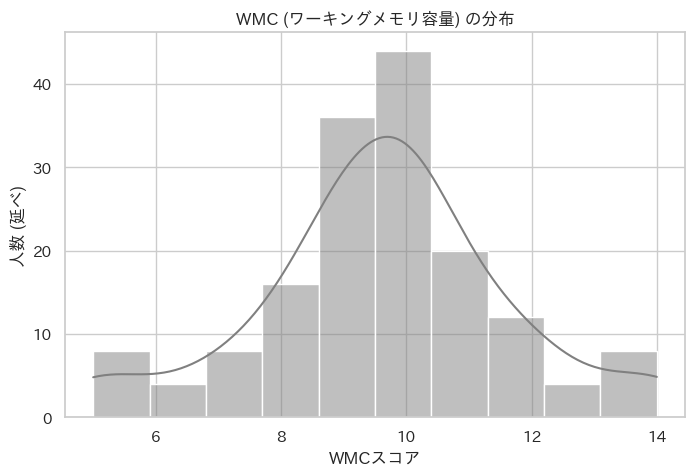

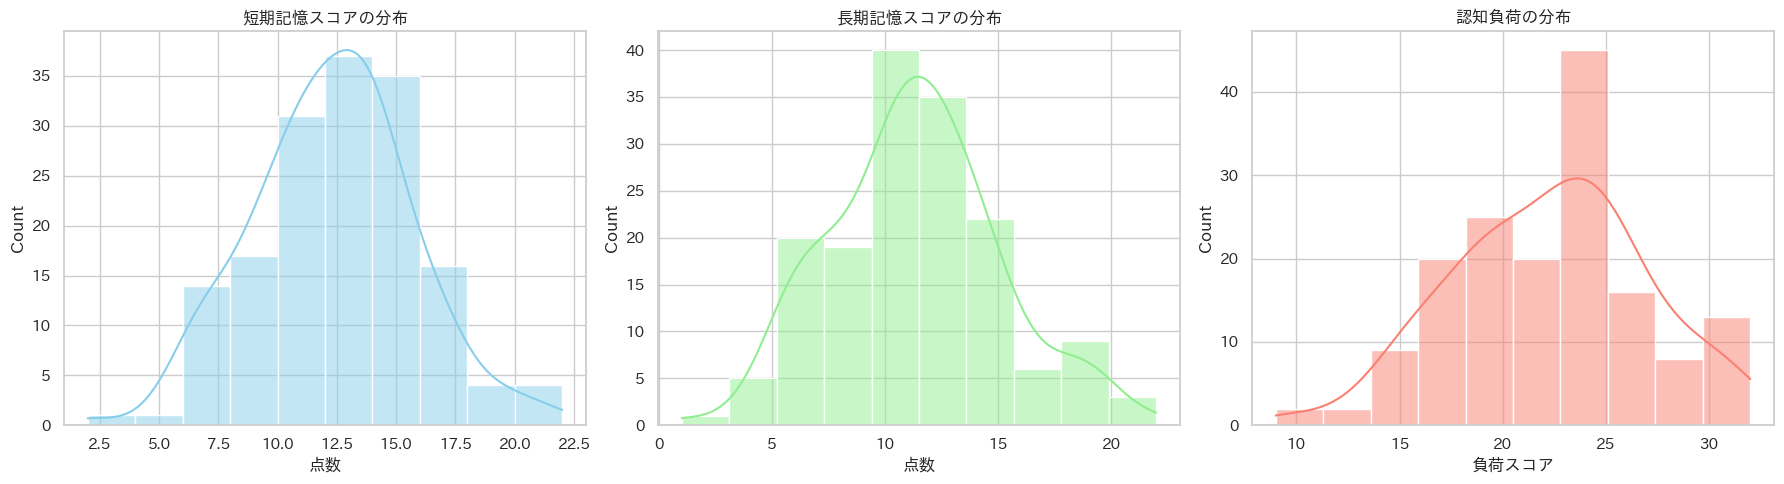

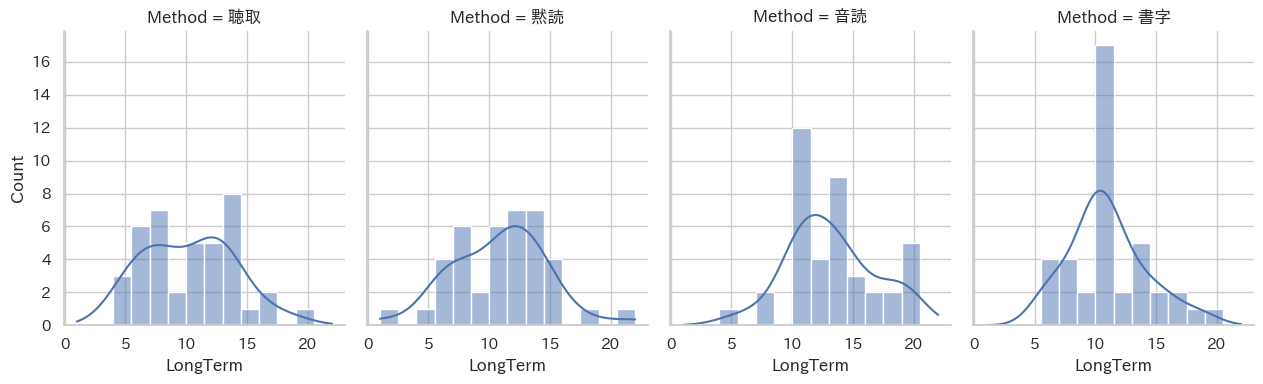

In [98]:
# 1. WMC (個人の記憶容量) の分布
# -------------------------------------------------------
plt.figure(figsize=(8, 5))
sns.histplot(data=df_final_long, x='WMC', kde=True, bins=10, color='gray')
plt.title('WMC (ワーキングメモリ容量) の分布')
plt.xlabel('WMCスコア')
plt.ylabel('人数 (延べ)')
plt.show()

# 2. スコアと負荷の分布 (まとめて表示)
# -------------------------------------------------------
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# ShortTerm (短期記憶)
sns.histplot(data=df_final_long, x='ShortTerm', kde=True, bins=10, color='skyblue', ax=axes[0])
axes[0].set_title('短期記憶スコアの分布')
axes[0].set_xlabel('点数')

# LongTerm (長期記憶)
sns.histplot(data=df_final_long, x='LongTerm', kde=True, bins=10, color='lightgreen', ax=axes[1])
axes[1].set_title('長期記憶スコアの分布')
axes[1].set_xlabel('点数')

# Cognitive_Load (認知負荷)
sns.histplot(data=df_final_long, x='Load', kde=True, bins=10, color='salmon', ax=axes[2])
axes[2].set_title('認知負荷の分布')
axes[2].set_xlabel('負荷スコア')

plt.tight_layout()
plt.show()

# 3. (応用) 記憶方法ごとの分布の違いを見る
# -------------------------------------------------------
# 「書く」だけ分布が違うかも？などをチェック
sns.displot(
    data=df_final_long,
    x='LongTerm',
    col='Method', # 方法ごとにグラフを分ける
    kde=True,
    height=4,
    aspect=0.8
)
plt.show()

# ***上位10名・下位10名***

In [99]:
# 重複を除いて参加者IDとWMCのペアを作成
unique_participants = df_final_long[['Participant_ID', 'WMC']].drop_duplicates()

# WMCで降順にソート（点数が高い順）
sorted_participants = unique_participants.sort_values(by='WMC', ascending=False)

# 上位10名と下位10名のIDリストを作成
top_10_ids = sorted_participants.head(10)['Participant_ID'].tolist()
bottom_10_ids = sorted_participants.tail(10)['Participant_ID'].tolist()

# --- 2. グループ割り当て関数 ---
def assign_group(participant_id):
    if participant_id in top_10_ids:
        return '高群 (Top 10)'
    elif participant_id in bottom_10_ids:
        return '低群 (Bottom 10)'
    else:
        return 'Middle' # 中間層

# データフレームにグループ列を適用
df_final_long['WMC_Group'] = df_final_long['Participant_ID'].apply(assign_group)

# --- 3. 分析対象データの抽出 (中間層を除外) ---
# 'Middle' を除外し、高群・低群だけのデータフレームを作成
df_extreme = df_final_long[df_final_long['WMC_Group'] != 'Middle'].copy()

# 確認表示
display(df_extreme[['Participant_ID', 'WMC', 'WMC_Group', 'Method']].head())

# 4. 各グループの人数の確認
print("\n[グループごとの人数 (レコード数 / 4条件)]")
# 1人あたり4条件あるので、レコード数÷4が人数になります
print(df_extreme['WMC_Group'].value_counts().to_markdown(numalign="left", stralign="left"))

,Participant_ID,WMC,WMC_Group,Method
4,P02,14,高群 (Top 10),聴取
5,P02,14,高群 (Top 10),黙読
6,P02,14,高群 (Top 10),音読
7,P02,14,高群 (Top 10),書字
8,P03,11,高群 (Top 10),聴取



[グループごとの人数 (レコード数 / 4条件)]
| WMC_Group        | count   |
|:-----------------|:--------|
| 高群 (Top 10)    | 40      |
| 低群 (Bottom 10) | 40      |



--- 3-2. 可視化: 短期記憶 (ShortTerm) の交互作用プロット ---


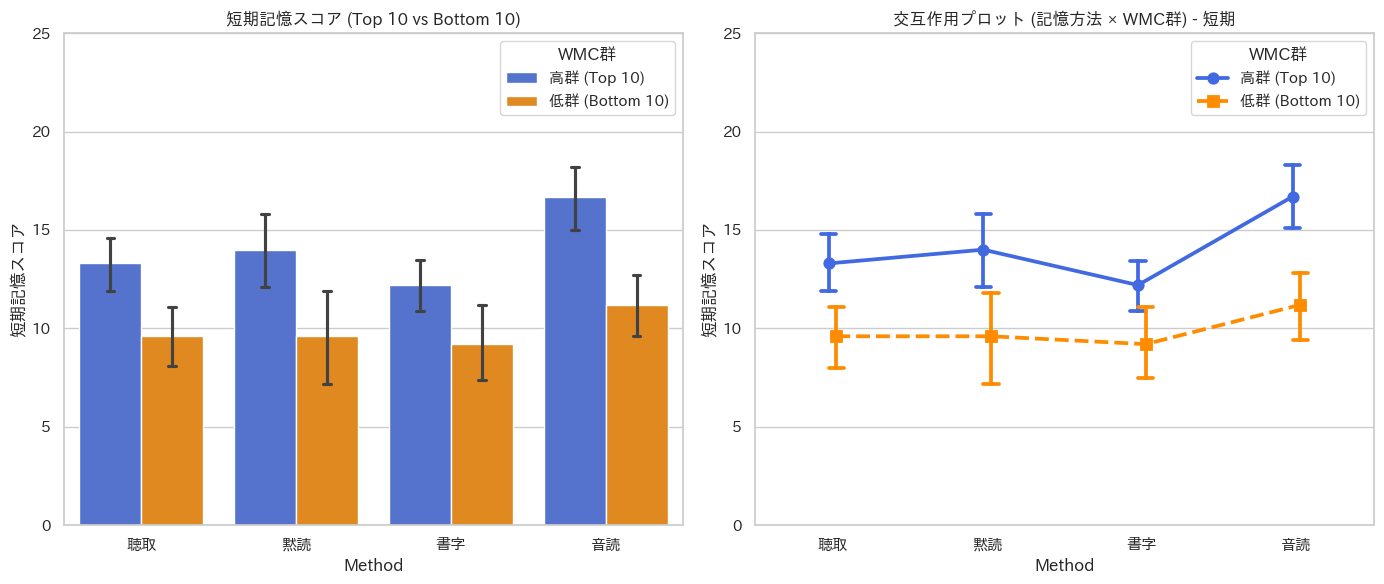

In [101]:
# -------------------------------------------------------
# 3-2. 可視化: 短期記憶 (ShortTerm) の交互作用プロット ---
# -------------------------------------------------------
print("\n--- 3-2. 可視化: 短期記憶 (ShortTerm) の交互作用プロット ---")

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# 表示順序を定義 (凡例やX軸の並びを固定)
hue_order = ['高群 (Top 10)', '低群 (Bottom 10)']
method_order = ['聴取', '黙読', '書字', '音読'] # 必要に応じて変更してください

# --- (左) 集合棒グラフ ---
sns.barplot(
    data=df_extreme,
    x='Method',
    y='ShortTerm',   # ここを ShortTerm に変更
    hue='WMC_Group',
    hue_order=hue_order,
    order=method_order,
    palette={'高群 (Top 10)': 'royalblue', '低群 (Bottom 10)': 'darkorange'},
    capsize=0.1,
    ax=axes[0]
)
axes[0].set_title("短期記憶スコア (Top 10 vs Bottom 10)") # タイトル変更
axes[0].set_ylabel("短期記憶スコア") # ラベル変更
axes[0].set_ylim(0, 25) # スコア範囲に合わせて調整 (短期の方が点数が高い傾向があるため25推奨)
axes[0].legend(title='WMC群')

# --- (右) 交互作用図 ---
sns.pointplot(
    data=df_extreme,
    x='Method',
    y='ShortTerm',   # ここを ShortTerm に変更
    hue='WMC_Group',
    hue_order=hue_order,
    order=method_order,
    palette={'高群 (Top 10)': 'royalblue', '低群 (Bottom 10)': 'darkorange'},
    markers=["o", "s"],
    linestyles=["-", "--"],
    dodge=True,
    capsize=0.1,
    ax=axes[1]
)
axes[1].set_title("交互作用プロット (記憶方法 × WMC群) - 短期") # タイトル変更
axes[1].set_ylabel("短期記憶スコア") # ラベル変更
axes[1].set_ylim(0, 25) # 範囲調整
axes[1].legend(title='WMC群')

plt.tight_layout()
plt.show()


--- 3-2. 可視化: 長期記憶 (LongTerm) の交互作用プロット ---


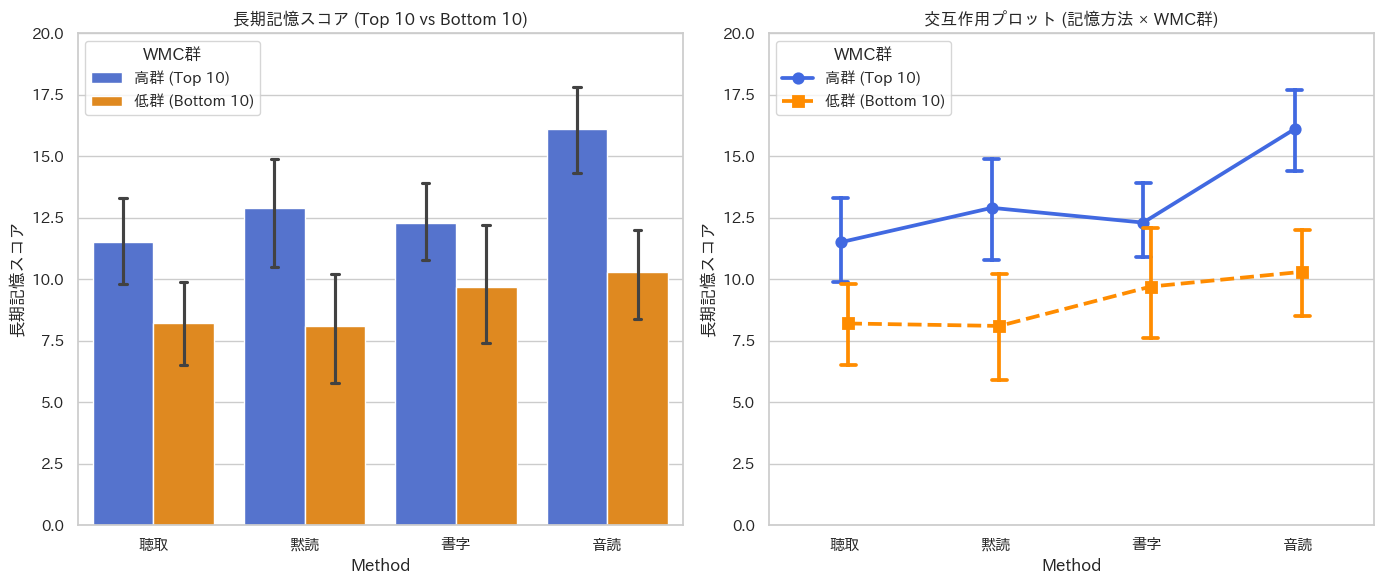

In [102]:
# -------------------------------------------------------
# 3-2. 可視化: 長期記憶 (LongTerm) の交互作用プロット ---
# -------------------------------------------------------
print("\n--- 3-2. 可視化: 長期記憶 (LongTerm) の交互作用プロット ---")

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# 表示順序を定義 (凡例やX軸の並びを固定)
hue_order = ['高群 (Top 10)', '低群 (Bottom 10)']
method_order = ['聴取', '黙読', '書字', '音読']  # 必要に応じて変更してください

# --- (左) 集合棒グラフ ---
sns.barplot(
    data=df_extreme,
    x='Method',
    y='LongTerm',
    hue='WMC_Group',
    hue_order=hue_order,
    order=method_order,
    palette={'高群 (Top 10)': 'royalblue', '低群 (Bottom 10)': 'darkorange'}, # 色を明確に分ける
    capsize=0.1,
    ax=axes[0]
)
axes[0].set_title("長期記憶スコア (Top 10 vs Bottom 10)")
axes[0].set_ylabel("長期記憶スコア")
axes[0].set_ylim(0, 20)
axes[0].legend(title='WMC群')

# --- (右) 交互作用図 ---
sns.pointplot(
    data=df_extreme,
    x='Method',
    y='LongTerm',
    hue='WMC_Group',
    hue_order=hue_order,
    order=method_order,
    palette={'高群 (Top 10)': 'royalblue', '低群 (Bottom 10)': 'darkorange'},
    markers=["o", "s"],
    linestyles=["-", "--"],
    dodge=True,
    capsize=0.1,
    ax=axes[1]
)
axes[1].set_title("交互作用プロット (記憶方法 × WMC群)")
axes[1].set_ylabel("長期記憶スコア")
axes[1].set_ylim(0, 20)
axes[1].legend(title='WMC群')

plt.tight_layout()
plt.show()

## 重回帰分析

In [103]:
# 短期
df_extreme['WMC_Group'] = pd.Categorical(
    df_extreme['WMC_Group'],
    categories=['低群 (Bottom 10)', '高群 (Top 10)'], # 最初の要素が基準になる
    ordered=False
)

df_extreme['Method'] = pd.Categorical(
    df_extreme['Method'],
    categories=['聴取', '黙読', '書字', '音読'], # Listen が基準になる
    ordered=False
)

formula_simple = "ShortTerm ~ WMC_Group * Method + Load"

# 3. 実行
model = smf.mixedlm(formula_simple, data=df_extreme, groups="Participant_ID")
result = model.fit()

# 結果表示
print(result.summary())

                     Mixed Linear Model Regression Results
Model:                     MixedLM         Dependent Variable:         ShortTerm
No. Observations:          80              Method:                     REML     
No. Groups:                20              Scale:                      4.7704   
Min. group size:           4               Log-Likelihood:             -181.3566
Max. group size:           4               Converged:                  Yes      
Mean group size:           4.0                                                  
--------------------------------------------------------------------------------
                                      Coef.  Std.Err.   z    P>|z| [0.025 0.975]
--------------------------------------------------------------------------------
Intercept                             11.111    2.071  5.366 0.000  7.052 15.169
WMC_Group[T.高群 (Top 10)]               3.441    1.343  2.562 0.010  0.809  6.073
Method[T.黙読]                           0.244    1.

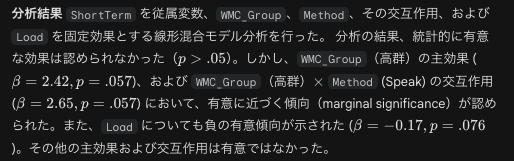

In [104]:
# 長期記憶

df_extreme['WMC_Group'] = pd.Categorical(
    df_extreme['WMC_Group'],
    categories=['低群 (Bottom 10)', '高群 (Top 10)'], # 最初の要素が基準になる
    ordered=False
)

df_extreme['Method'] = pd.Categorical(
    df_extreme['Method'],
    categories=['聴取', '黙読', '書字', '音読'], # Listen が基準になる
    ordered=False
)

formula_simple = "LongTerm ~ WMC_Group * Method + Load"

# 3. 実行
model = smf.mixedlm(formula_simple, data=df_extreme, groups="Participant_ID")
result = model.fit()

# 結果表示
print(result.summary())

                     Mixed Linear Model Regression Results
Model:                     MixedLM         Dependent Variable:         LongTerm 
No. Observations:          80              Method:                     REML     
No. Groups:                20              Scale:                      5.5240   
Min. group size:           4               Log-Likelihood:             -187.7574
Max. group size:           4               Converged:                  Yes      
Mean group size:           4.0                                                  
--------------------------------------------------------------------------------
                                      Coef.  Std.Err.   z    P>|z| [0.025 0.975]
--------------------------------------------------------------------------------
Intercept                              9.003    2.245  4.010 0.000  4.602 13.403
WMC_Group[T.高群 (Top 10)]               3.162    1.500  2.108 0.035  0.222  6.102
Method[T.黙読]                           0.030    1.

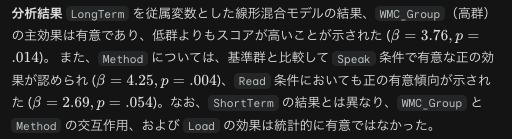

## ***3要因分散分析***

In [ ]:
df_final_long

In [105]:
import pandas as pd
import statsmodels.formula.api as smf

# WMCグループ (High/Low) を作成
wmc_median = df_final_long['WMC'].median()
df_final_long['WMC_Group'] = df_final_long['WMC'].apply(lambda x: 'High' if x >= wmc_median else 'Low')

# 上位10名・下位10名のグループ (Ext_Group) を作成
# まず参加者ごとのWMCを取得してソート
participants = df_final_long[['Participant_ID', 'WMC']].drop_duplicates().sort_values(by='WMC')
bottom_10_ids = participants.head(10)['Participant_ID'].tolist()
top_10_ids = participants.tail(10)['Participant_ID'].tolist()

def get_ext_group(pid):
    if pid in top_10_ids:
        return 'Top10'
    elif pid in bottom_10_ids:
        return 'Bottom10'
    else:
        return 'Middle'

df_final_long['Ext_Group'] = df_final_long['Participant_ID'].apply(get_ext_group)

# --- NEW: Melt the dataframe to prepare for 3-way ANOVA ---
df_anova_long = df_final_long.melt(
    id_vars=['Participant_ID', 'WMC', 'Method', 'WMC_Group', 'Ext_Group'],
    value_vars=['ShortTerm', 'LongTerm'],
    var_name='Term', # This will differentiate ShortTerm vs LongTerm
    value_name='Score' # This will be the dependent variable
)
# ---------------------------------------------------------
# 2. 3要因分散分析 (Mixed Linear Model)
# ---------------------------------------------------------

# --- 分析A: 全体 (N=42, High vs Low) ---
print("=== Analysis A: Full Data (High vs Low WMC) ===")
# モデル式: スコア ~ 時間 * 方法 * WMCグループ
# groups引数でランダム効果（参加者ID）を指定
model_all = smf.mixedlm("Score ~ C(Term) * C(Method) * C(WMC_Group)", # Use C() for categorical variables
                        data=df_anova_long, # Use the melted dataframe
                        groups=df_anova_long["Participant_ID"])
result_all = model_all.fit()
print(result_all.summary().tables[1]) # 係数テーブルを表示


# --- 分析B: 極端群 (Top10 vs Bottom10) ---
print("\n=== Analysis B: Extreme Groups (Top10 vs Bottom10) ===")
# Middleを除外したデータを作成
df_ext_anova = df_anova_long[df_anova_long['Ext_Group'].isin(['Top10', 'Bottom10'])].copy() # .copy() to avoid SettingWithCopyWarning

model_ext = smf.mixedlm("Score ~ C(Term) * C(Method) * C(Ext_Group)", # Use C() for categorical variables
                        data=df_ext_anova, # Use the filtered melted dataframe
                        groups=df_ext_anova["Participant_ID"])
result_ext = model_ext.fit()
print(result_ext.summary().tables[1])

=== Analysis A: Full Data (High vs Low WMC) ===
                                                     Coef. Std.Err.       z  \
Intercept                                           11.409    0.675  16.900   
C(Term)[T.ShortTerm]                                 0.409    0.597   0.685   
C(Method)[T.聴取]                                     -0.045    0.597  -0.076   
C(Method)[T.音読]                                      3.182    0.597   5.328   
C(Method)[T.黙読]                                      1.000    0.597   1.675   
C(WMC_Group)[T.Low]                                 -0.965    1.006  -0.959   
C(Term)[T.ShortTerm]:C(Method)[T.聴取]                 0.955    0.844   1.130   
C(Term)[T.ShortTerm]:C(Method)[T.音読]                 0.500    0.844   0.592   
C(Term)[T.ShortTerm]:C(Method)[T.黙読]                 0.864    0.844   1.023   
C(Term)[T.ShortTerm]:C(WMC_Group)[T.Low]            -0.298    0.890  -0.335   
C(Method)[T.聴取]:C(WMC_Group)[T.Low]                 -1.566    0.890  -1.759   
C(Me

# ***認知負荷項目ごと***

In [ ]:
df_load = pd.read_excel('/content/認知負荷項目ごと.xlsx')
df_load.head()

N=20の実データを用いてWMCと認知負荷の項目ごとの得点を可視化する

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import japanize_matplotlib

# 1. 分析したい負荷の列名をリストアップ（df_loadの列名に基づき抽出）
# "頭使う量", "体の負荷", "イライラ", "集中力" が含まれる列をすべて取得します
target_keywords = ['頭使う量', '体の負荷', 'イライラ', '集中力']
load_columns = [col for col in df_load.columns if any(k in col for k in target_keywords)]

# 2. 相関係数の計算
# WMCと負荷項目だけのデータフレームを作り、相関行列を計算
corr_matrix = df_load[['WMC'] + load_columns].corr()

# 3. WMCの行だけを抽出してプロット
plt.figure(figsize=(18, 2))  # 横長に設定
sns.heatmap(
    corr_matrix.loc[['WMC'], load_columns], # 縦軸をWMCのみに絞る
    annot=True,        # 数値を表示
    fmt=".2f",         # 小数点2桁
    cmap='coolwarm',   # 青(負の相関)〜赤(正の相関)
    vmin=-1, vmax=1,   # スケールを-1から1に固定
    cbar_kws={'label': '相関係数 (r)'}
)

plt.title('WMCと各認知負荷項目の相関関係', fontsize=14)
plt.xlabel('認知負荷項目', fontsize=12)
plt.ylabel('WMC', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.show()

In [ ]:
metrics_map = {
    '頭使う量': 'Mental Demand',
    '体の負荷': 'Physical Demand',
    'イライラ': 'Frustration',
    '集中力': 'Concentration'
}
tasks = ['Read', 'Write', 'Listen', 'Speak']

melted_data = []

for index, row in df_load.iterrows():
    for metric_jp, metric_en in metrics_map.items():
        for task in tasks:
            col_name = f"{metric_jp}({task})"
            if col_name in df_load.columns:
                melted_data.append({
                    'WMC': row['WMC'],
                    'Metric': metric_en,   # 負荷の種類
                    'Task': task,          # タスクの種類
                    'Score': row[col_name] # スコア
                })

df_long = pd.DataFrame(melted_data)

# 2. マトリックス状にプロット (sns.lmplot)
sns.set(style="ticks")
g = sns.lmplot(
    data=df_long,
    x='Score',       # 横軸：負荷スコア
    y='WMC',         # 縦軸：WMC
    row='Metric',    # 行：負荷の種類で分ける
    col='Task',      # 列：タスクで分ける
    height=2.5,      # 1つのグラフの高さ
    aspect=1.2,      # アスペクト比
    line_kws={'color': 'red'}, # 回帰直線の色
    scatter_kws={'alpha': 0.5} # 点の透明度
)

# タイトルなどの調整
g.set_axis_labels("Cognitive Load Score", "WMC")
g.fig.suptitle('WMC vs Cognitive Load Items Regression Matrix', y=1.02)
plt.show()